<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Create-overview-map-with-custom-legend" data-toc-modified-id="Create-overview-map-with-custom-legend-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Create overview map with custom legend</a></span></li><li><span><a href="#Zooming-in" data-toc-modified-id="Zooming-in-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Zooming in</a></span></li></ul></div>

In [1]:
# load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
%config InlineBackend.figure_format = 'retina'


## Load data



In [11]:
# define data directory
shapedir='/Users/maartenk/Documents/git/CookBooks/Sources/ShapeFiles/bayern-latest-free/'

# boundary = 'al_riks.shp' 
# boundary_fp = shapedir+boundary
# map_df_sweden_boundary = gpd.read_file(boundary_fp)

landuse = 'gis_osm_landuse_a_free_1.shp' 
landuse_fp = shapedir+landuse
map_df_bayern_landuse = gpd.read_file(landuse_fp)

# # read files

rail = 'gis_osm_railways_free_1.shp' 
rail_fp = shapedir+rail
map_df_bayern_rail = gpd.read_file(rail_fp)

road = 'gis_osm_roads_free_1.shp' 
road_fp = shapedir+road
map_df_bayern_road = gpd.read_file(road_fp)

water = 'gis_osm_water_a_free_1.shp' 
water_fp = shapedir+water
map_df_bayern_water = gpd.read_file(water_fp)

natural = 'gis_osm_natural_a_free_1.shp' 
natural_fp = shapedir+natural
map_df_bayern_natural = gpd.read_file(natural_fp)



In [8]:
map_df_bayern_natural.shape

(1096, 5)

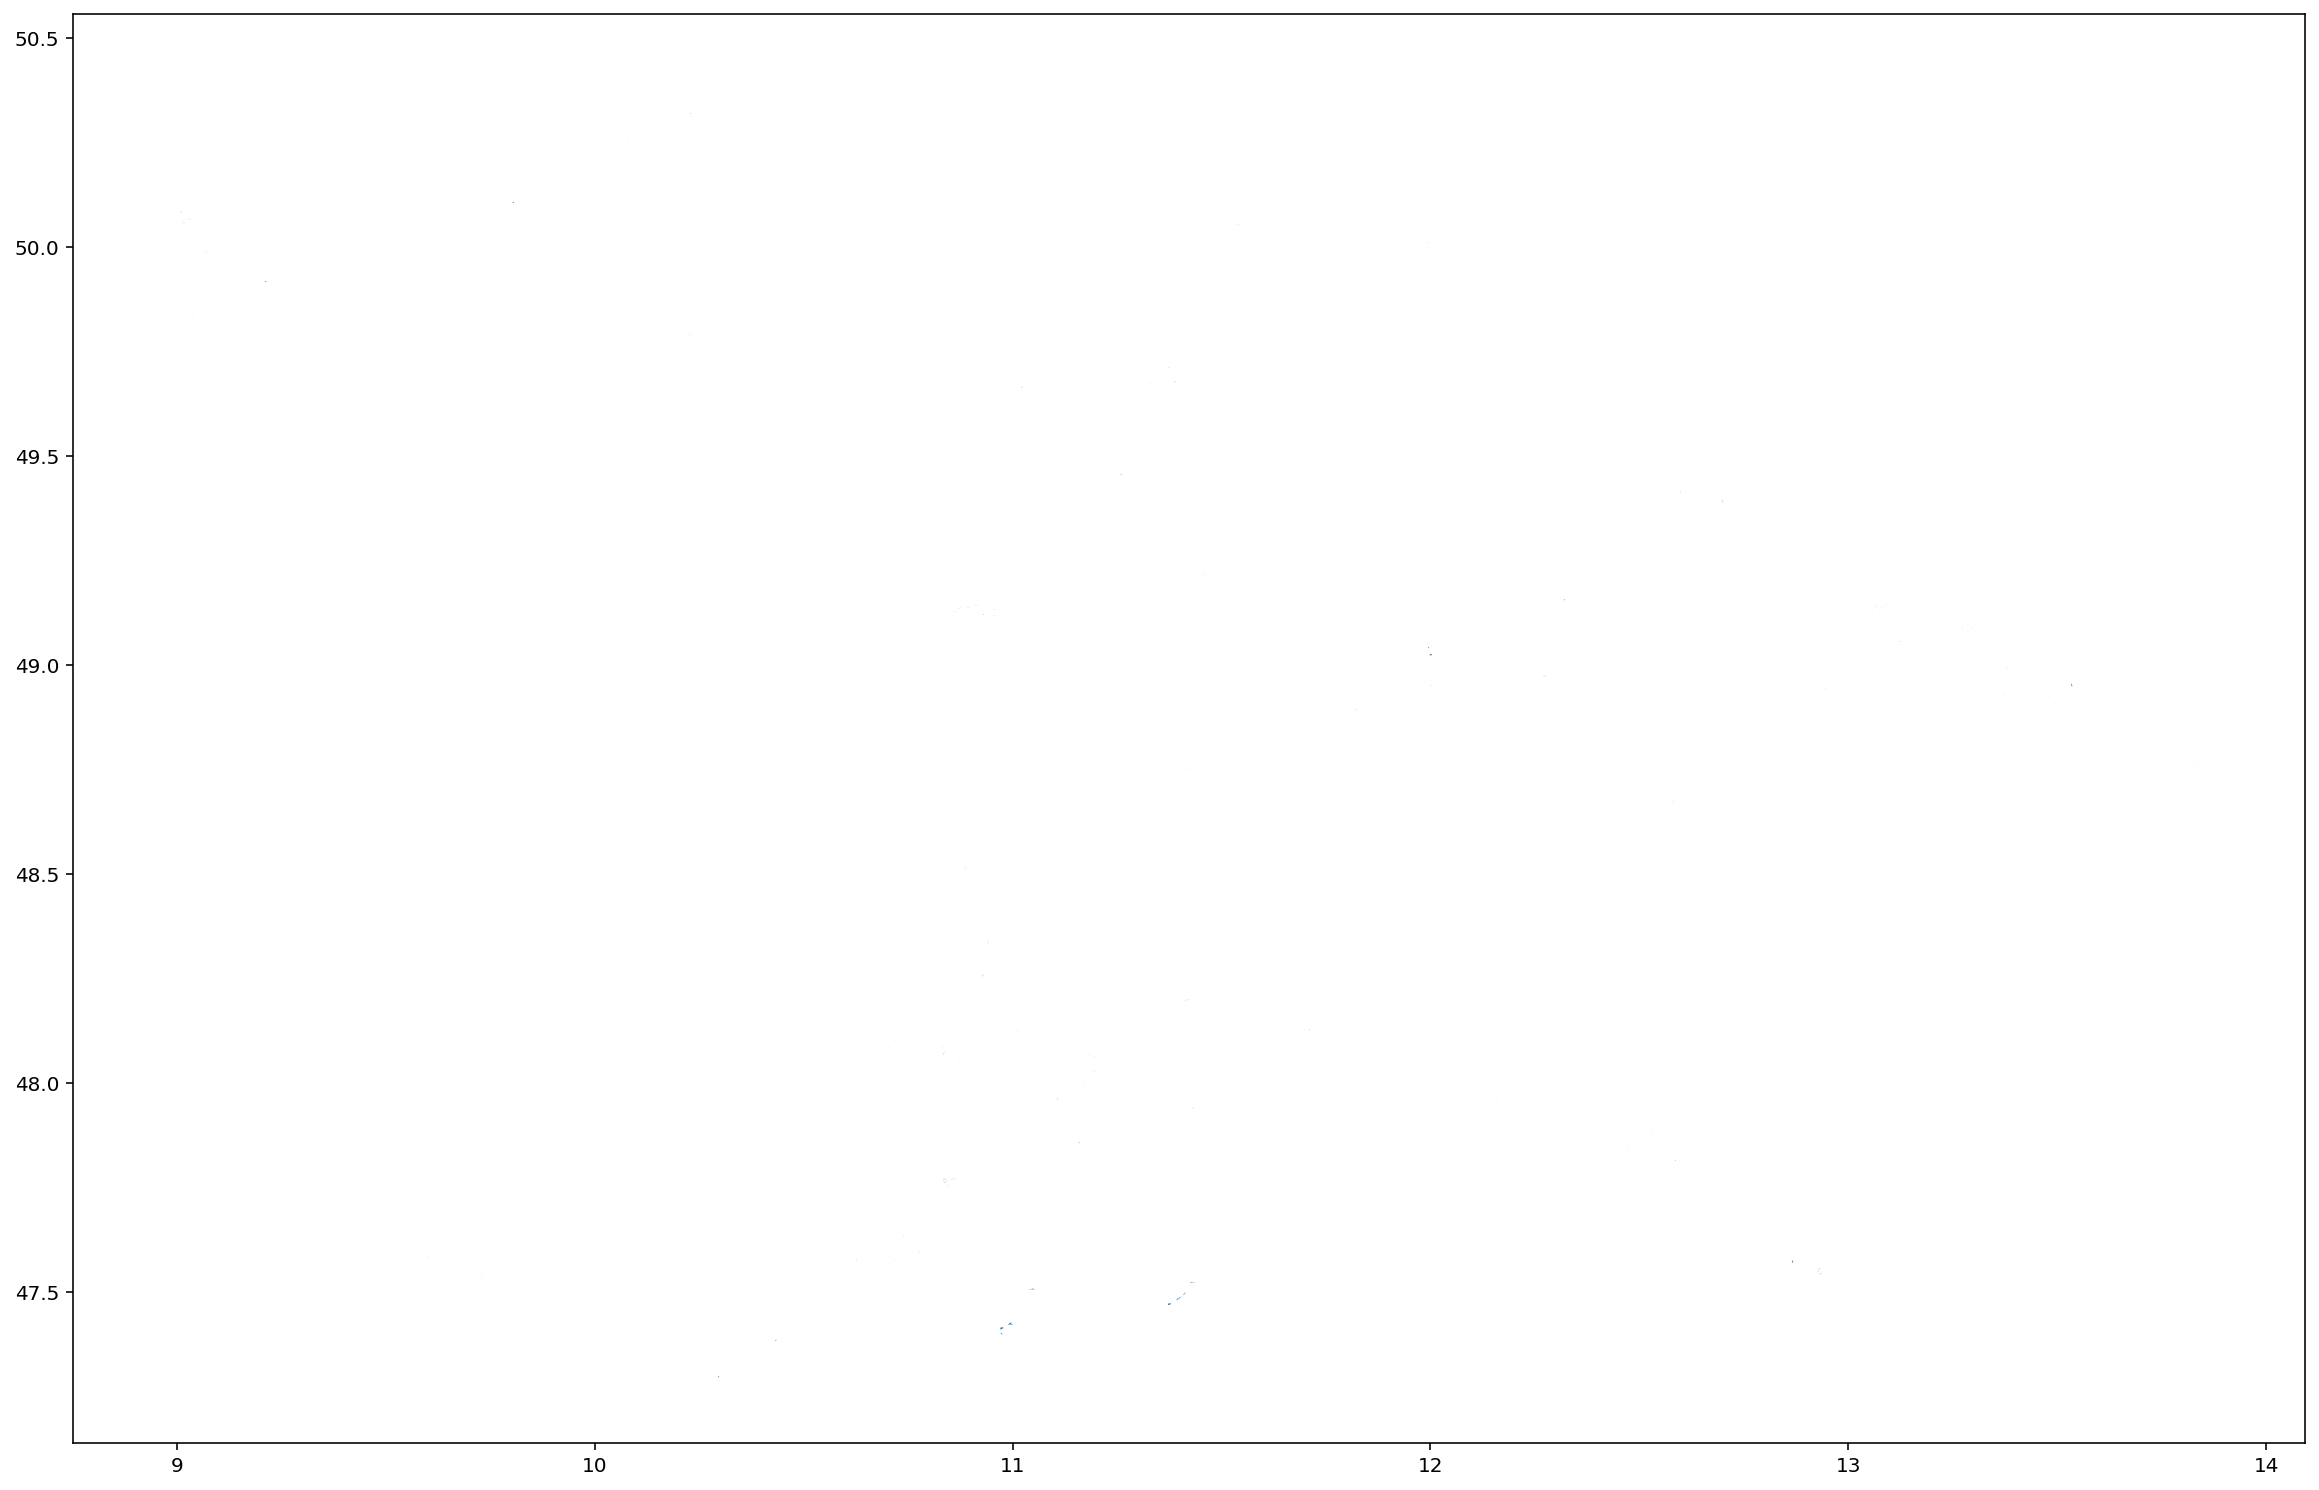

In [10]:
map_df_bayern_natural.plot(figsize=(20,20))

In [13]:
map_df_bayern_rail.head()

osm_id  code fclass                     name  layer bridge tunnel  \
0  2481116  6101   rail                     None      0      F      F   
1  2571242  6101   rail              Staudenbahn      0      F      F   
2  2953974  6101   rail  EichstÃ¤ttâBeilngries      0      F      F   
3  2953975  6101   rail                     None      0      F      F   
4  2953977  6101   rail                     None      0      F      F   

                                            geometry  
0  LINESTRING (10.86893 48.39377, 10.86857 48.395...  
1  LINESTRING (10.59814 48.17542, 10.59813 48.175...  
2  LINESTRING (11.17335 48.88863, 11.17297 48.889...  
3  LINESTRING (10.86732 48.08404, 10.86319 48.083...  
4  LINESTRING (10.85950 48.08227, 10.85790 48.081...

In [14]:
print('KOD \t FREQ \t KATEGORI')
print('--- \t ---- \t --------')
for x,y, z in zip(map_df_bayern_landuse['code'].value_counts().index.format(),
                  map_df_bayern_landuse['fclass'].value_counts().values.tolist(),
               map_df_bayern_landuse['fclass'].value_counts().index.format()):
    print(x,'\t', y,'\t', z)

KOD 	 FREQ 	 KATEGORI
--- 	 ---- 	 --------
7205 	 166798 	 farm
7201 	 121090 	 forest
7208 	 113240 	 meadow
7217 	 84668 	 scrub
7203 	 65881 	 residential
7218 	 44762 	 grass
7204 	 9657 	 industrial
7215 	 8370 	 orchard
7202 	 5764 	 park
7209 	 5333 	 commercial
7206 	 4932 	 cemetery
7207 	 4864 	 allotments
7214 	 2659 	 quarry
7216 	 1803 	 vineyard
7211 	 1418 	 recreation_ground
7212 	 1218 	 retail
7219 	 1069 	 heath
7210 	 589 	 nature_reserve
7213 	 270 	 military


In [17]:
map_df_bayern_landuse.crs

{'init': 'epsg:4326'}

AttributeError: 'AxesSubplot' object has no attribute 'map_df_bayern_landuse'

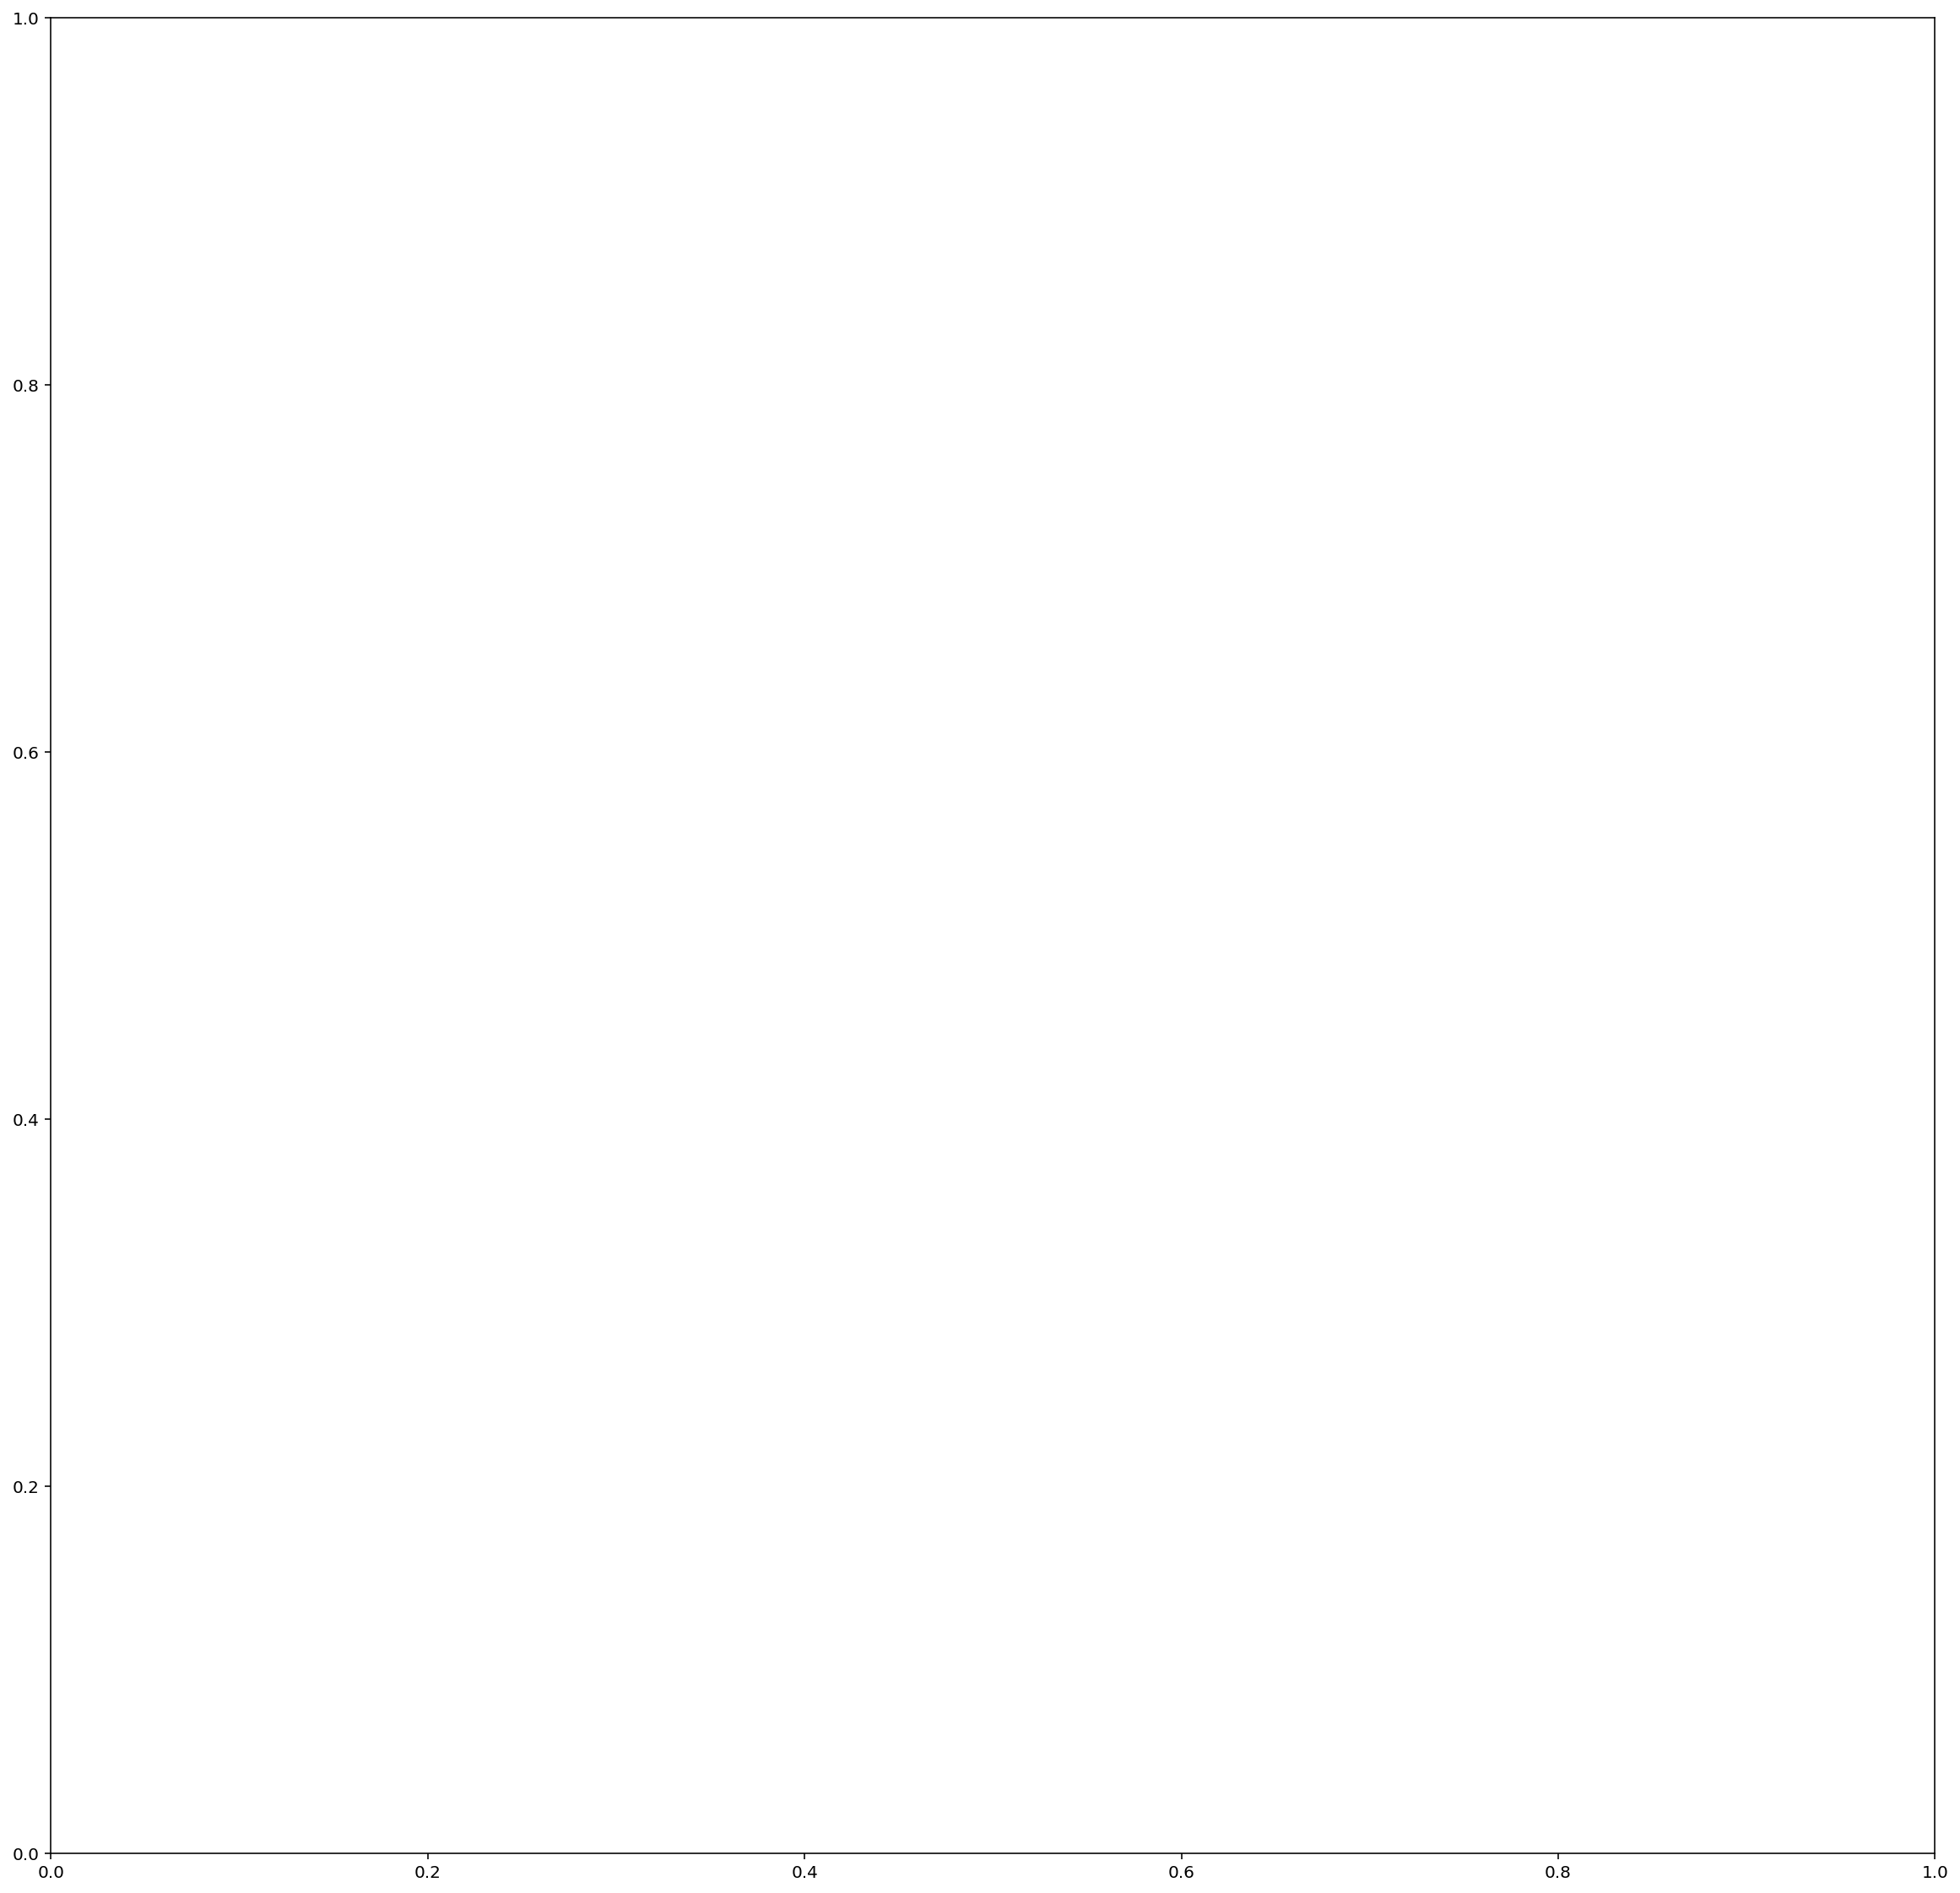

In [18]:
#Define fig,ax
fig = plt.figure(figsize=(20,20)) 
ax = plt.axes()

ax.map_df_bayern_landuse.plot(ax=ax)
ax.map_df_bayern_natural.plot(ax=ax
                             )

In [20]:
# from shapely.geometry import Point
# from matplotlib import pyplot
# import cartopy.crs as ccrs
# import matplotlib.pyplot as plt

final_crs = {'init': 'epsg:3006'}

# ax = plt.axes()
# print(f'Original CRS: {map_df_bayern_landuse.crs}')
map_df_bayern_landuse=map_df_bayern_landuse.to_crs(crs=final_crs)
# print(f'New CRS: {map_df_bayern_landuse.crs}')

# map_df_bayern_landuse.sample(100000).plot(figsize=(20,20))

map_df_bayern_road=map_df_bayern_road.to_crs(crs=final_crs)
map_df_bayern_rail=map_df_bayern_rail.to_crs(crs=final_crs)
map_df_bayern_water=map_df_bayern_water.to_crs(crs=final_crs)

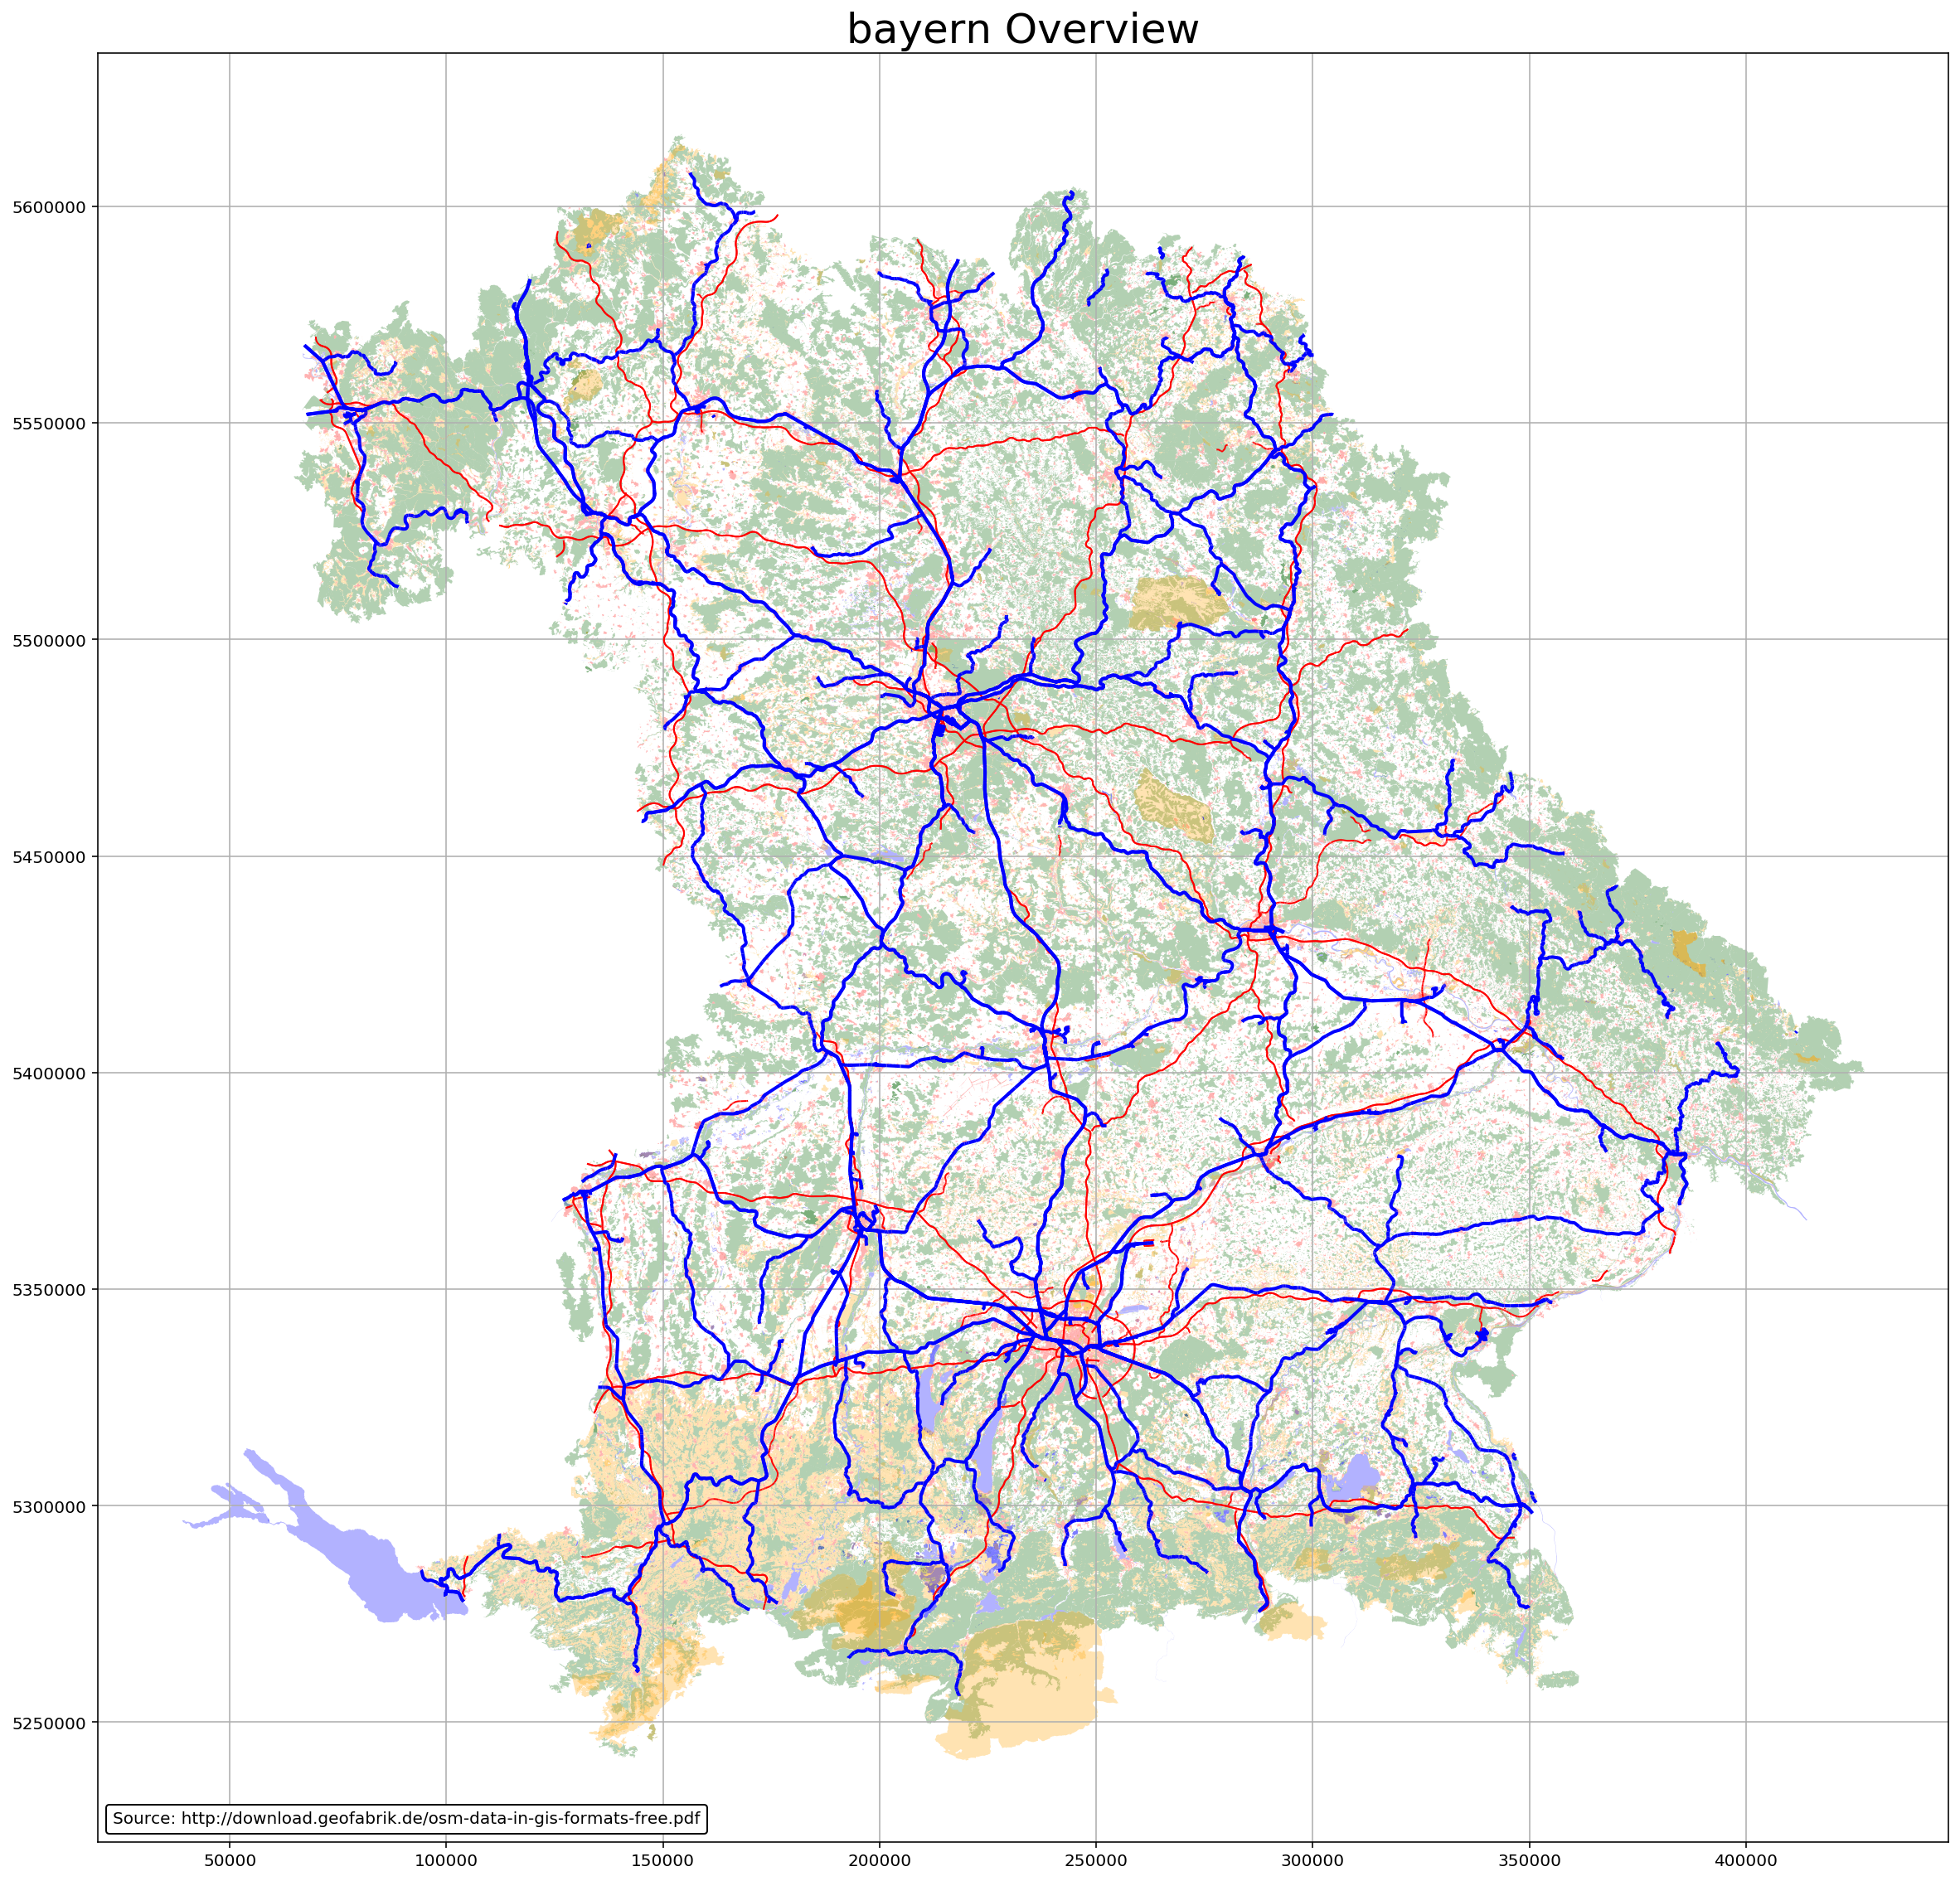

In [21]:
# Load specific libraries
import matplotlib.patheffects as mpe
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.offsetbox import AnchoredText
# set some parameters
outline=mpe.withStroke(linewidth=8, foreground='black')
alpha = .3
source = 'http://download.geofabrik.de/osm-data-in-gis-formats-free.pdf'


#Define fig,ax
fig = plt.figure(figsize=(20,20)) 
ax = plt.axes()

#define layers
map_df_bayern_water.plot(ax=ax, facecolor='blue',alpha=alpha, label='Water')
water_patch = mpatches.Patch(color='blue', alpha=alpha, label='Water')

map_df_bayern_landuse.loc[map_df_bayern_landuse['code'].isin([7203,7204,7214,7112,7209])].plot(
    ax=ax, facecolor='red', alpha=alpha, label='Build-up')
buildup_patch = mpatches.Patch(color='red', alpha=alpha, label='Build Up')

map_df_bayern_landuse.loc[map_df_bayern_landuse['code'] == 7201].plot(
    ax=ax, facecolor='darkgreen', alpha=alpha, label='forest')
forest_patch = mpatches.Patch(color='darkgreen', alpha=alpha, label='Forest')

map_df_bayern_landuse[map_df_bayern_landuse['code'].isin([7219,7217,7208,7218,7202,7210,7207,7215,7213,7216])].plot(
    ax=ax, facecolor='orange', alpha=alpha, label='Open area')
open_patch = mpatches.Patch(color='orange', alpha=alpha, label='Open Areas')

# map_df_bayern_boundary.loc[map_df_bayern_boundary['KKOD'] <= 4130].plot(ax=ax, edgecolor='black', lw=.5)
# boundary_line = mlines.Line2D([], [],label='Boundary')

map_df_bayern_road.loc[map_df_bayern_road['code'] < 5113].plot(ax=ax,color='red', lw=1)#,path_effects=[outline])
road_line = mlines.Line2D([], [], color='red', label='Major roads')

map_df_bayern_rail.loc[map_df_bayern_rail['code'] == 6101].plot(ax=ax, color='blue', lw=2, label='railroad')
rail_line = mlines.Line2D([], [], color='blue', label='Railroads')  

# #create text labels
# names = map_df_bayern_names[map_df_bayern_names['KKOD'].isin([109, 104])]

# texts = []

# for x, y, label in zip(names.geometry.x, 
#                        names.geometry.y, 
#                        names['TEXT']):
#                          texts.append(plt.text(x, y, label, fontsize = 12, weight='heavy', 
#                                               bbox=dict(boxstyle='square,pad=0.1', fc='white', ec='none')))
#add title     
ax.set_title('bayern Overview', fontdict={'fontsize': '25', 'fontweight' : '3'})

#add annotation
at = AnchoredText(f'Source: {source}',
                  prop=dict(size=10), frameon=True,
                  loc='lower left')
at.patch.set_boxstyle('round,pad=0.,rounding_size=0.2')
ax.add_artist(at)

#plot leggend
# plt.legend(handles=[water_patch, buildup_patch, forest_patch, open_patch, 
#                     road_line, rail_line, boundary_line], bbox_to_anchor=(1.05, 0), 
#            loc='lower left', borderaxespad=0., title='Legend', title_fontsize='12')

ax.grid(True)
# ax.axis('off')

plt.show()

NameError: name 'map_df_sweden_water' is not defined

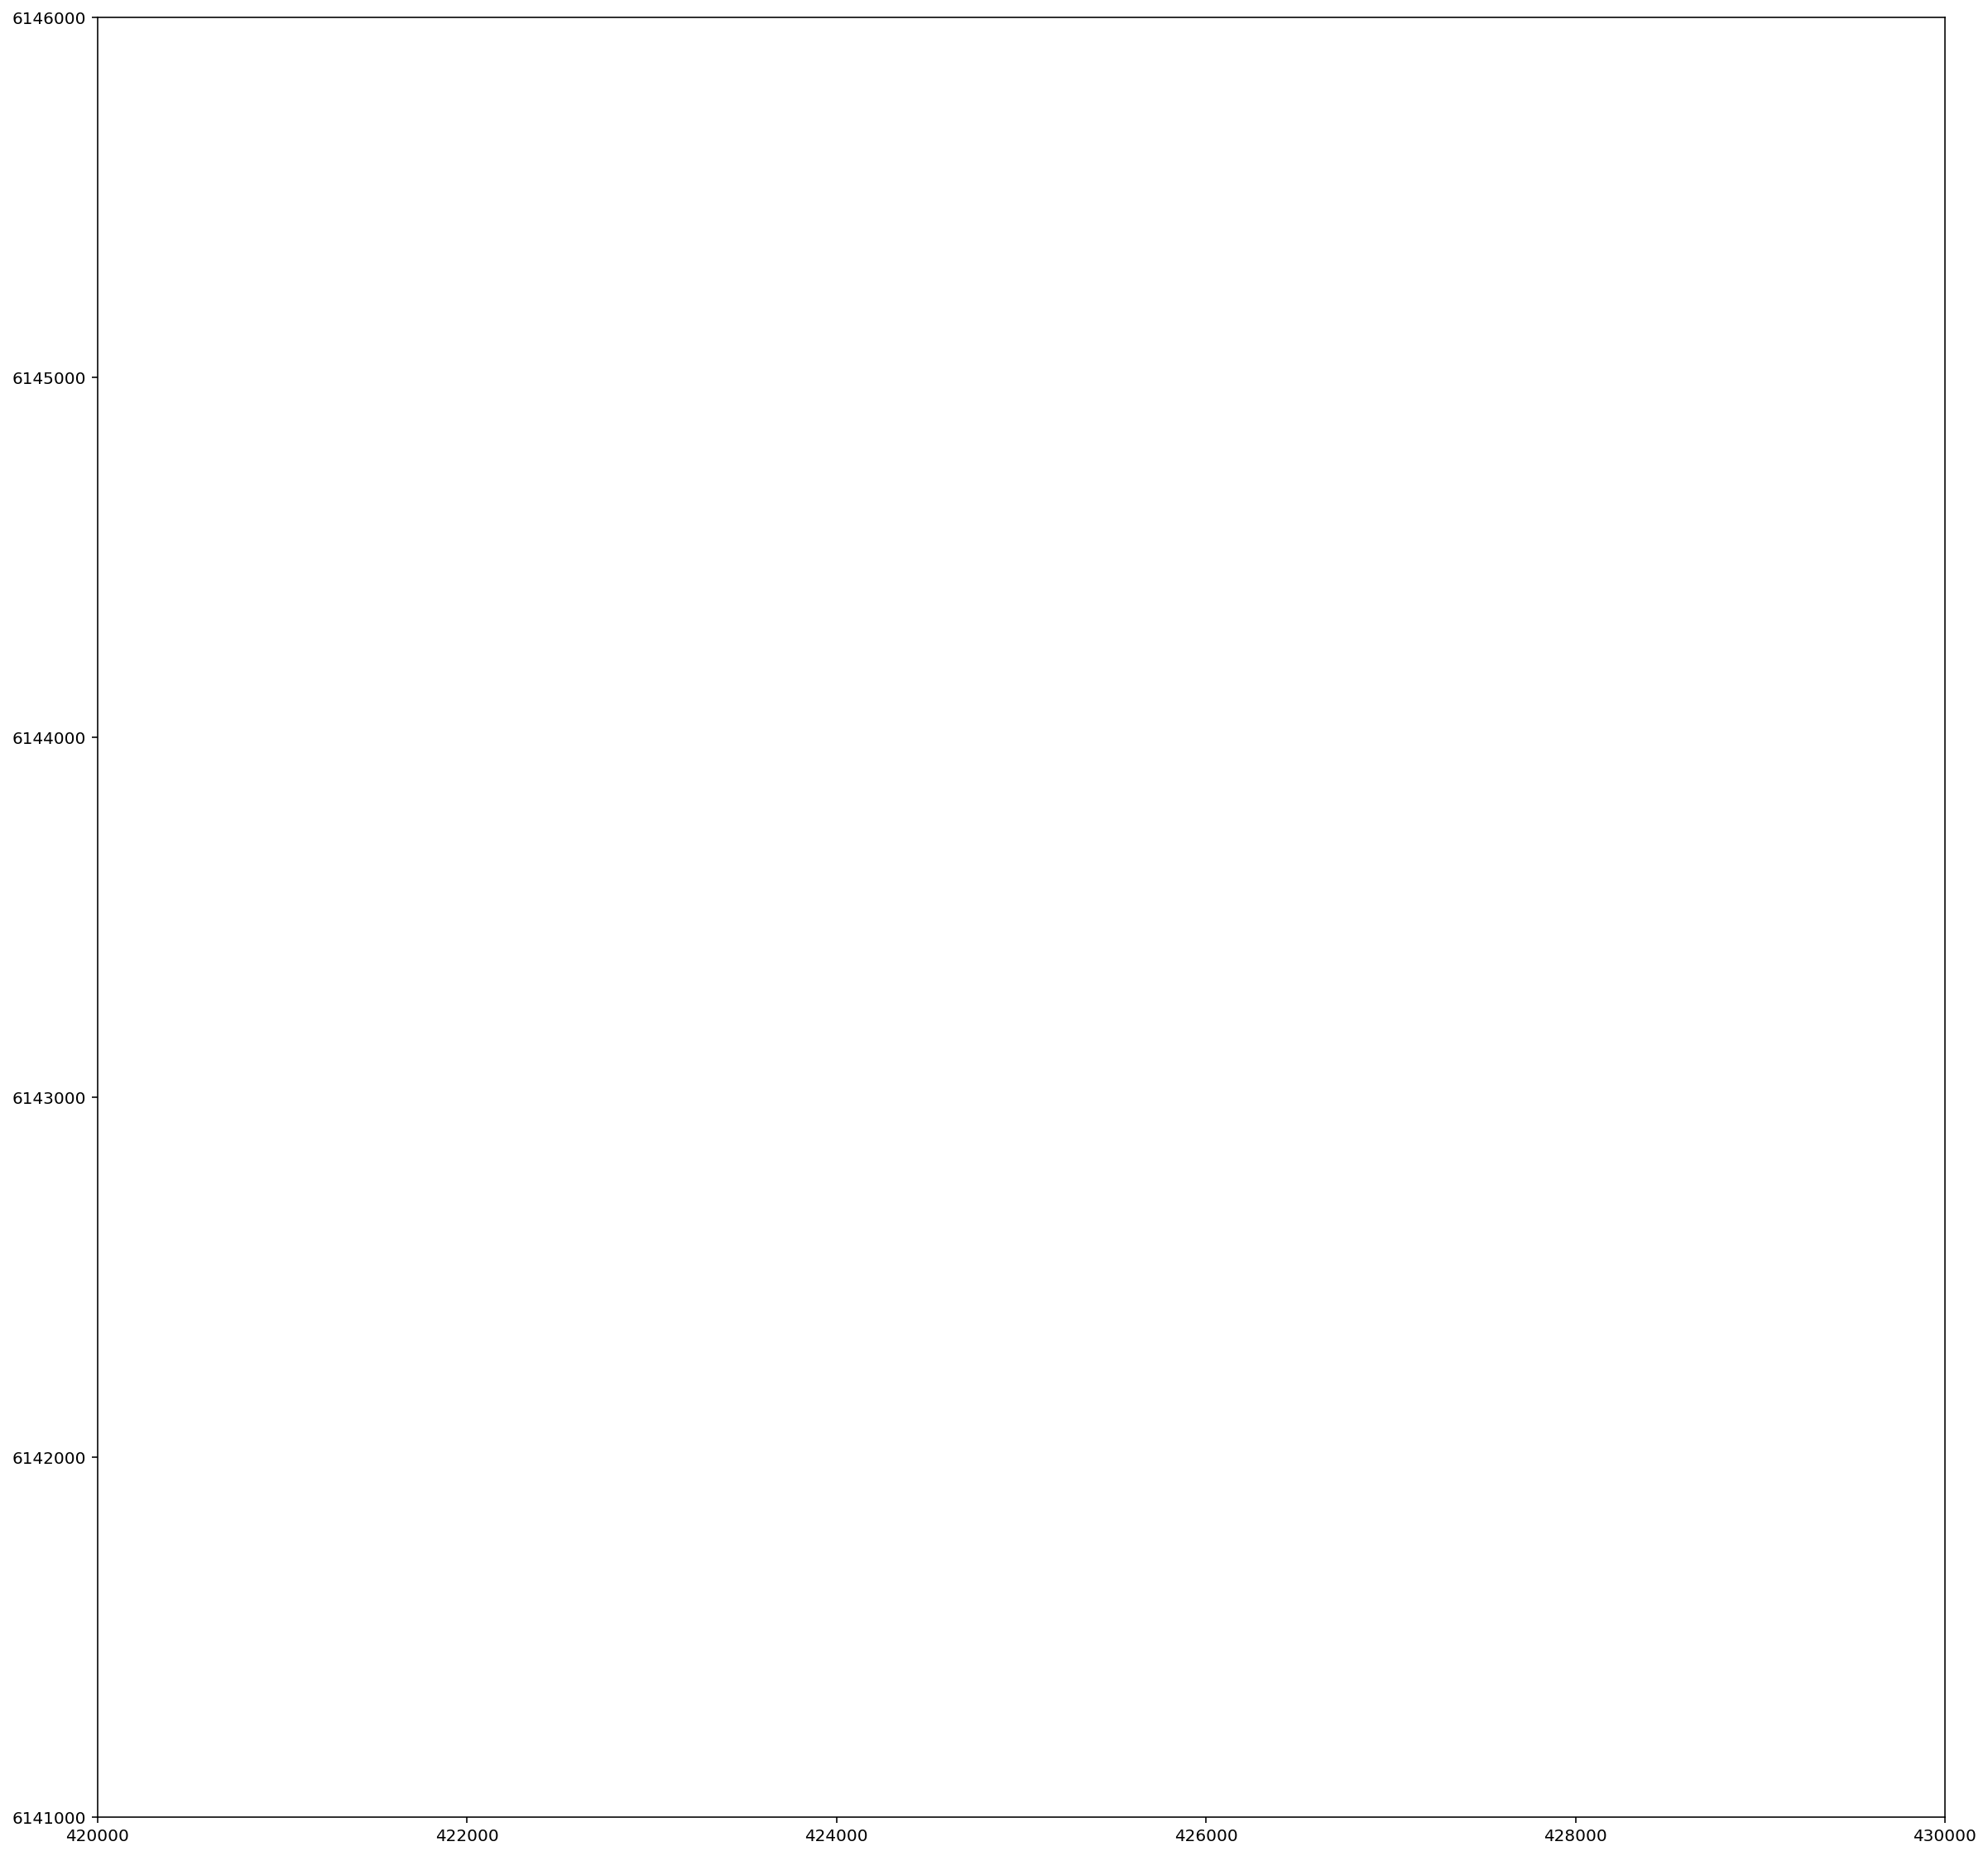

In [8]:
# Load specific libraries
import matplotlib.patheffects as mpe
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.offsetbox import AnchoredText
# set some parameters
outline=mpe.withStroke(linewidth=8, foreground='black')
alpha = .3
source = 'http://download.geofabrik.de/osm-data-in-gis-formats-free.pdf'


#Define fig,ax
fig = plt.figure(figsize=(20,20)) 
ax = plt.axes()

plt.xlim(420000,430000)
plt.ylim(6141000,6146000)

#define layers
map_df_sweden_water.plot(ax=ax, facecolor='blue',alpha=alpha, label='Water')
water_patch = mpatches.Patch(color='blue', alpha=alpha, label='Water')

map_df_sweden_landuse.loc[map_df_sweden_landuse['code'].isin([7203,7204,7206,7207,7209])].plot(
    ax=ax, facecolor='red', alpha=alpha, label='Build-up')
buildup_patch = mpatches.Patch(color='red', alpha=alpha, label='Build Up')

map_df_sweden_landuse.loc[map_df_sweden_landuse['code'] == 7201].plot(
    ax=ax, facecolor='darkgreen', alpha=alpha, label='forest')
forest_patch = mpatches.Patch(color='darkgreen', alpha=alpha, label='Forest')

map_df_sweden_landuse[map_df_sweden_landuse['code'].isin([7210,7211,7219,7217,7208,7218,7202,7210,7207,7215,7213,7216,7228,7229])].plot(ax=ax, facecolor='orange', alpha=alpha, label='Open area')
open_patch = mpatches.Patch(color='orange', alpha=alpha, label='Open Areas')

# map_df_sweden_boundary.loc[map_df_sweden_boundary['KKOD'] <= 4130].plot(ax=ax, edgecolor='black', lw=.5)
# boundary_line = mlines.Line2D([], [],label='Boundary')

map_df_sweden_road.loc[map_df_sweden_road['code'] < 5116].plot(ax=ax,color='red', lw=1)#,path_effects=[outline])
road_line = mlines.Line2D([], [], color='red', label='Major roads')

map_df_sweden_rail.loc[map_df_sweden_rail['code'] == 6101].plot(ax=ax, color='blue', lw=2, label='railroad')
rail_line = mlines.Line2D([], [], color='blue', label='Railroads')  

# #create text labels
# names = map_df_sweden_names[map_df_sweden_names['KKOD'].isin([109, 104])]

# texts = []

# for x, y, label in zip(names.geometry.x, 
#                        names.geometry.y, 
#                        names['TEXT']):
#                          texts.append(plt.text(x, y, label, fontsize = 12, weight='heavy', 
#                                               bbox=dict(boxstyle='square,pad=0.1', fc='white', ec='none')))
#add title     
ax.set_title('Sweden Overview', fontdict={'fontsize': '25', 'fontweight' : '3'})

#add annotation
at = AnchoredText(f'Source: {source}',
                  prop=dict(size=10), frameon=True,
                  loc='lower left')
at.patch.set_boxstyle('round,pad=0.,rounding_size=0.2')
ax.add_artist(at)

#plot leggend
# plt.legend(handles=[water_patch, buildup_patch, forest_patch, open_patch, 
#                     road_line, rail_line, boundary_line], bbox_to_anchor=(1.05, 0), 
#            loc='lower left', borderaxespad=0., title='Legend', title_fontsize='12')

ax.grid(True)
# ax.axis('off')

plt.show()

In [ ]:
###### -------------------------------------------------------------------------------
# Name:        perp_lines.py
# Purpose:     Generates multiple profile lines perpendicular to an input line
#
# Author:      JamesS
#
# Created:     13/02/2013
#-------------------------------------------------------------------------------
""" Takes a shapefile containing a single line as input. Generates lines
    perpendicular to the original with the specified length and spacing and
    writes them to a new shapefile.

    The data should be in a projected co-ordinate system.
"""

import numpy as np
from fiona import collection
from shapely.geometry import LineString, MultiLineString

# ##############################################################################
# User input

# Input shapefile. Must be a single, simple line, in projected co-ordinates
in_shp = map_df_sweden_rail.loc[map_df_sweden_rail['osm_id'] == '757526489']

# The shapefile to which the perpendicular lines will be written
out_shp = r'Output.shp'

# Profile spacing. The distance at which to space the perpendicular profiles
# In the same units as the original shapefile (e.g. metres)
spc = 1000

# Length of cross-sections to calculate either side of central line
# i.e. the total length will be twice the value entered here.
# In the same co-ordinates as the original shapefile
sect_len = 100
# ##############################################################################

# Open the shapefile and get the data
source = collection(in_shp, "r")
data = source.next()['geometry']
line = LineString(data['coordinates'])

# Define a schema for the output features. Add a new field called 'Dist'
# to uniquely identify each profile
schema = source.schema.copy()
schema['properties']['Dist'] = 'float'

# Open a new sink for the output features, using the same format driver
# and coordinate reference system as the source.
sink = collection(out_shp, "w", driver=source.driver, schema=schema,
                  crs=source.crs)

# Calculate the number of profiles to generate
n_prof = int(line.length/spc)

# Start iterating along the line
for prof in range(1, n_prof+1):
    # Get the start, mid and end points for this segment
    seg_st = line.interpolate((prof-1)*spc)
    seg_mid = line.interpolate((prof-0.5)*spc)
    seg_end = line.interpolate(prof*spc)

    # Get a displacement vector for this segment
    vec = np.array([[seg_end.x - seg_st.x,], [seg_end.y - seg_st.y,]])

    # Rotate the vector 90 deg clockwise and 90 deg counter clockwise
    rot_anti = np.array([[0, -1], [1, 0]])
    rot_clock = np.array([[0, 1], [-1, 0]])
    vec_anti = np.dot(rot_anti, vec)
    vec_clock = np.dot(rot_clock, vec)

    # Normalise the perpendicular vectors
    len_anti = ((vec_anti**2).sum())**0.5
    vec_anti = vec_anti/len_anti
    len_clock = ((vec_clock**2).sum())**0.5
    vec_clock = vec_clock/len_clock

    # Scale them up to the profile length
    vec_anti = vec_anti*sect_len
    vec_clock = vec_clock*sect_len

    # Calculate displacements from midpoint
    prof_st = (seg_mid.x + float(vec_anti[0]), seg_mid.y + float(vec_anti[1]))
    prof_end = (seg_mid.x + float(vec_clock[0]), seg_mid.y + float(vec_clock[1]))

    # Write to output
    rec = {'geometry':{'type':'LineString', 'coordinates':(prof_st, prof_end)},
           'properties':{'Id':0, 'Dist':(prof-0.5)*spc}}
    sink.write(rec)

# Tidy up
source.close()
sink.close()

In [45]:
map_df_sweden_rail.loc[map_df_sweden_rail['osm_id'] == '757526489']

22215    LINESTRING (529613.468 7073695.849, 529638.521...
Name: geometry, dtype: geometry

In [24]:
map_df_sweden_road.head()

osm_id  code  fclass            name  \
0  3406059  7201  forest       ÃrtskÃ¤r   
1  3406194  7201  forest            None   
2  3406251  7201  forest  Stora Jungfrun   
3  3406277  7201  forest   SÃ¤by Jungfru   
4  3406316  7201  forest  Lilla Jungfrun   

                                            geometry  
0  POLYGON ((641518.839 6597344.693, 641519.955 6...  
1  POLYGON ((645914.795 6596833.355, 645924.694 6...  
2  POLYGON ((641021.868 6596578.948, 641023.947 6...  
3  POLYGON ((641228.922 6596624.597, 641228.572 6...  
4  POLYGON ((641443.238 6596308.605, 641443.058 6...

In [14]:
# read and inspect files

file = 'my_riks.shp' 
file_fp = shapedir+file
map_df_sweden = gpd.read_file(file_fp)
print(f'Columns: {map_df_sweden.columns.values.tolist()}\n')

print('KOD \t FREQ \t KATEGORI')
print('--- \t ---- \t --------')
for x,y, z in zip(map_df_sweden['KKOD'].value_counts().index.format(),
                  map_df_sweden['KATEGORI'].value_counts().values.tolist(),
               map_df_sweden['KATEGORI'].value_counts().index.format()):
    print(x,'\t', y,'\t', z)

Columns: ['KKOD', 'KATEGORI', 'NAMN1', 'NAMN2', 'ADAT', 'geometry']

KOD 	 FREQ 	 KATEGORI
--- 	 ---- 	 --------
901 	 40357 	 Vattenyta
611 	 38577 	 Öppen mark
601 	 34208 	 Skogsmark
911 	 22339 	 Sankmark
303 	 2113 	 Tätort
631 	 1372 	 Kalfjäll
302 	 861 	 Annan koncentrerad bebyggelse
641 	 273 	 Glaciär
902 	 139 	 Hav, territorialt vatten
612 	 22 	 Alvarmark


In [15]:
# function to read, inspect data and save as GeoPandas df

def loaddata(infile):
 
    file_fp = shapedir+infile
    outfile = gpd.read_file(file_fp)
    print(f'Columns: {outfile.columns.values.tolist()}\n')

    print('KOD \t FREQ \t KATEGORI')
    print('--- \t ---- \t --------')
    for x,y, z in zip(outfile['KKOD'].value_counts().index[1:].format(),
                      outfile['KATEGORI'].value_counts().values[1:].tolist(),
                   outfile['KATEGORI'].value_counts().index[1:].format()):
        print(x,'\t', y,'\t', z)
        
    return outfile

In [16]:
map_df_sweden_names = loaddata('tx_riks.shp')

Columns: ['TEXT', 'KKOD', 'KATEGORI', 'TJUST', 'TSPARR', 'TRIKT', 'ADAT', 'geometry']

KOD 	 FREQ 	 KATEGORI
--- 	 ---- 	 --------
1   	 10855 	 Enstaka hus eller gård
52  	 10330 	 Naturnamn, små områden
76  	 8881 	 Höjdvärde
82  	 6206 	 Vattenyta, mycket litet område
5   	 1593 	 Tätort, 200-1999 inv
18  	 1574 	 Församlingskyrka
92  	 1463 	 Vattendrag, litet
12  	 1250 	 Tätortsdel, liten
3   	 1181 	 Stor by
98  	 918 	 Sankmark, liten
79  	 848 	 Vägnummer, riks- och länsväg
53  	 470 	 Naturnamn, litet område
61  	 402 	 Upplysningstext, liten
10  	 392 	 Annan konc bebyggelse, liten
83  	 309 	 Vattenyta, litet område
80  	 287 	 Trafikplatsnummer
11  	 239 	 Annan konc bebyggelse, stor
81  	 235 	 Vägnummer, europaväg
27  	 211 	 Offentlig byggnad t.ex. skola, slott m.m.
41  	 194 	 Naturreservat, litet
33  	 181 	 Landskap
7   	 179 	 Tätort, 2000-9999 inv
71  	 150 	 Industri, gruva, fyr, sluss, damm m.m.
107 	 141 	 Tätort, kommuncentrum, 2 000 - 9 999 inv
17  	 110 	 Ann

## Create overview map with custom legend

Turns out Matplotlib does not support legend handles automatically for Polygon geometries in geopandas. 
(https://github.com/geopandas/geopandas/issues/660). Creating a legend artist for every layer is the only workaround.
For lines and point  it does and in that case simply declaring a 'label = 'label'' with a 'plt.legend' would suffice.

This also illustrates the overlapping labels issue

## Zooming in



In [35]:

mapxwest = 400000
mapxeast = 600000
mapysouth = 6400000
mapynorth = 6600000

shapexwest = mapxwest * .9
shapexeast = mapxeast * 1.1
shapeysouth = mapysouth * .9
shapeynorth = mapynorth * 1.1

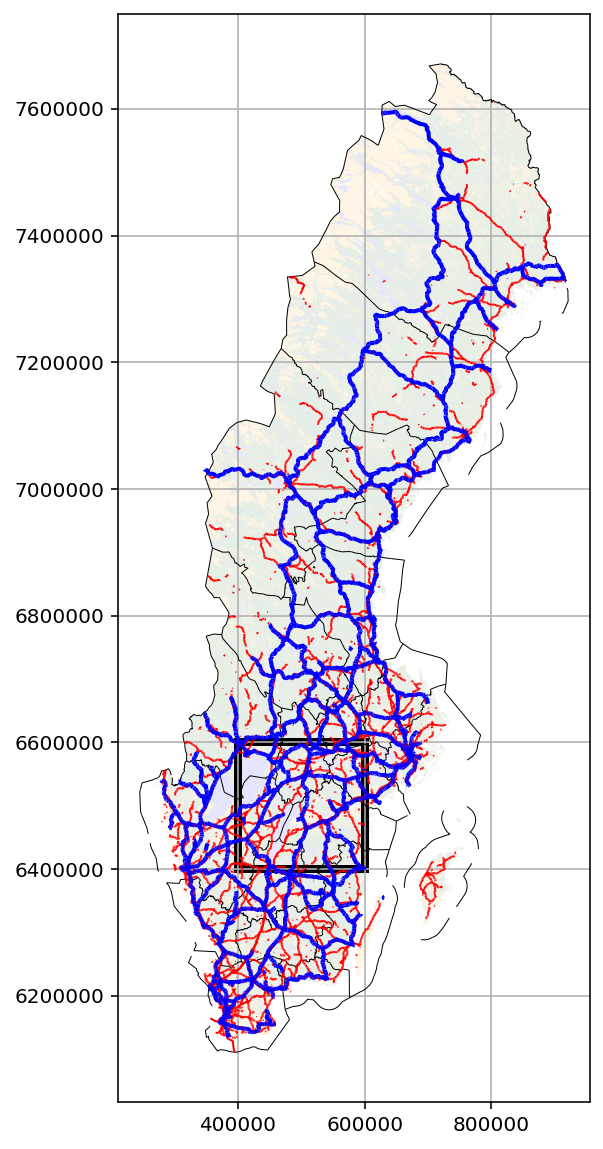

In [100]:
#Load specific libraries
import matplotlib.patheffects as mpe
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.offsetbox import AnchoredText
# set some parameters
outline=mpe.withStroke(linewidth=8, foreground='black')
alpha = .1
source = 'Landmeteriet.se'

#Define fig,ax
fig = plt.figure(figsize=(10,10)) 
ax = plt.axes()

#define layers
map_df_sweden_landuse.loc[map_df_sweden_landuse['KKOD'] == 901].plot(
    ax=ax, facecolor='blue',alpha=alpha, label='Water')
water_patch = mpatches.Patch(color='blue', alpha=alpha, label='Water')

map_df_sweden_landuse.loc[map_df_sweden_landuse['KKOD'] == 303].plot(
    ax=ax, facecolor='red', alpha=alpha, label='Build-up')
buildup_patch = mpatches.Patch(color='red', alpha=alpha, label='Build Up')

map_df_sweden_landuse.loc[map_df_sweden_landuse['KKOD'] == 601].plot(
    ax=ax, facecolor='darkgreen', alpha=alpha, label='forest')
forest_patch = mpatches.Patch(color='darkgreen', alpha=alpha, label='Forest')

map_df_sweden_landuse[map_df_sweden_landuse['KKOD'].isin([611,612,911, 631, 302])].plot(
    ax=ax, facecolor='orange', alpha=alpha, label='Open area')
open_patch = mpatches.Patch(color='orange', alpha=alpha, label='Open Areas')

map_df_sweden_boundary.loc[map_df_sweden_boundary['KKOD'] <= 4130].plot(ax=ax, edgecolor='black', lw=.5)
boundary_line = mlines.Line2D([], [],label='Boundary')

map_df_sweden_road.loc[map_df_sweden_road['KKOD'] < 5300].plot(ax=ax,color='red', lw=1)#,path_effects=[outline])
road_line = mlines.Line2D([], [], color='red', label='Major roads')

map_df_sweden_rail.plot(ax=ax, color='blue', lw=2, label='railroad')
rail_line = mlines.Line2D([], [], color='blue', label='Railroads')  

#create text labels
# names = map_df_sweden_names[map_df_sweden_names['KKOD'].isin([109, 104])]

# texts = []

# for x, y, label in zip(names.geometry.x, 
#                        names.geometry.y, 
#                        names['TEXT']):
#                          texts.append(plt.text(x, y, label, fontsize = 12, weight='heavy', 
#                                               bbox=dict(boxstyle='square,pad=0.1', fc='white', ec='none')))
# #add title     
# ax.set_title('Sweden Overview', fontdict={'fontsize': '25', 'fontweight' : '3'})

# #add annotation
# at = AnchoredText(f'Source: {source}',
#                   prop=dict(size=10), frameon=True,
#                   loc='lower left')
# at.patch.set_boxstyle('round,pad=0.,rounding_size=0.2')
# ax.add_artist(at)

# #plot leggend
# plt.legend(handles=[water_patch, buildup_patch, forest_patch, open_patch, 
#                     road_line, rail_line, boundary_line], bbox_to_anchor=(1.05, 0), 
#            loc='lower left', borderaxespad=0., title='Legend', title_fontsize='12')
rect = mpatches.Rectangle((mapxwest,mapysouth), mapxeast-mapxwest,mapynorth-mapysouth, lw=4, edgecolor='black', fc='none')
ax.add_patch(rect)
ax.grid(True)
# ax.axis('off')

plt.show()

In [86]:
mpatches.Rectangle((mapxwest,mapysouth), mapxeast-mapxwest,mapynorth-mapysouth, lw=20, color='black')

In [60]:
bounds=map_df_sweden_water['geometry'].cx[shapexwest:shapexeast,shapeysouth:shapeynorth]
map_df_sweden_water = map_df_sweden_water[map_df_sweden_water.geometry.within(bounds)]

# map_df_sweden[map_df_sweden.geometry.within(map_df_sweden['geometry'].cx[shapexwest:shapexeast,shapeysouth:shapeynorth])]

In [61]:
bounds=map_df_sweden_boundary['geometry'].cx[shapexwest:shapexeast,shapeysouth:shapeynorth]
map_df_sweden_boundary = map_df_sweden_boundary[map_df_sweden_boundary.geometry.within(bounds)]

# map_df_sweden[map_df_sweden.geometry.within(map_df_sweden['geometry'].cx[shapexwest:shapexeast,shapeysouth:shapeynorth])]

In [62]:
bounds=map_df_sweden_rail['geometry'].cx[shapexwest:shapexeast,shapeysouth:shapeynorth]
map_df_sweden_rail = map_df_sweden_rail[map_df_sweden_rail.geometry.within(bounds)]

# map_df_sweden[map_df_sweden.geometry.within(map_df_sweden['geometry'].cx[shapexwest:shapexeast,shapeysouth:shapeynorth])]

In [63]:
bounds=map_df_sweden_road['geometry'].cx[shapexwest:shapexeast,shapeysouth:shapeynorth]
map_df_sweden_road = map_df_sweden_road[map_df_sweden_road.geometry.within(bounds)]

# map_df_sweden[map_df_sweden.geometry.within(map_df_sweden['geometry'].cx[shapexwest:shapexeast,shapeysouth:shapeynorth])]

In [64]:
# # way to control colors, insert color column
# fig, ax = plt.subplots()
# ax.set_aspect('equal')
# gpd.plotting.plot_polygon_collection(ax, gdf['geometry'], gdf['colors'], plot_values=False)

In [65]:
bounds=map_df_sweden_names['geometry'].cx[mapxwest:mapxeast,mapysouth:mapynorth]
map_df_sweden_names_ = map_df_sweden_names[map_df_sweden_names.geometry.within(bounds)]
map_df_sweden_names_.loc[(map_df_sweden_names_['KKOD'].isin([109, 104, 108]))].shape
# map_df_sweden[map_df_sweden.geometry.within(map_df_sweden['geometry'].cx[shapexwest:shapexeast,shapeysouth:shapeynorth])]

In [66]:
# plt.figure(figsize=(20,20)) 
# ax=plt.axes()
# plt.xlim(mapxwest,mapxeast)
# plt.ylim(mapysouth, mapynorth)
map_df_sweden_names_.loc[(map_df_sweden_names_['KKOD'].isin([109, 104, 108]))].shape

(23, 8)

TypeError: cannot unpack non-iterable AxesSubplot object

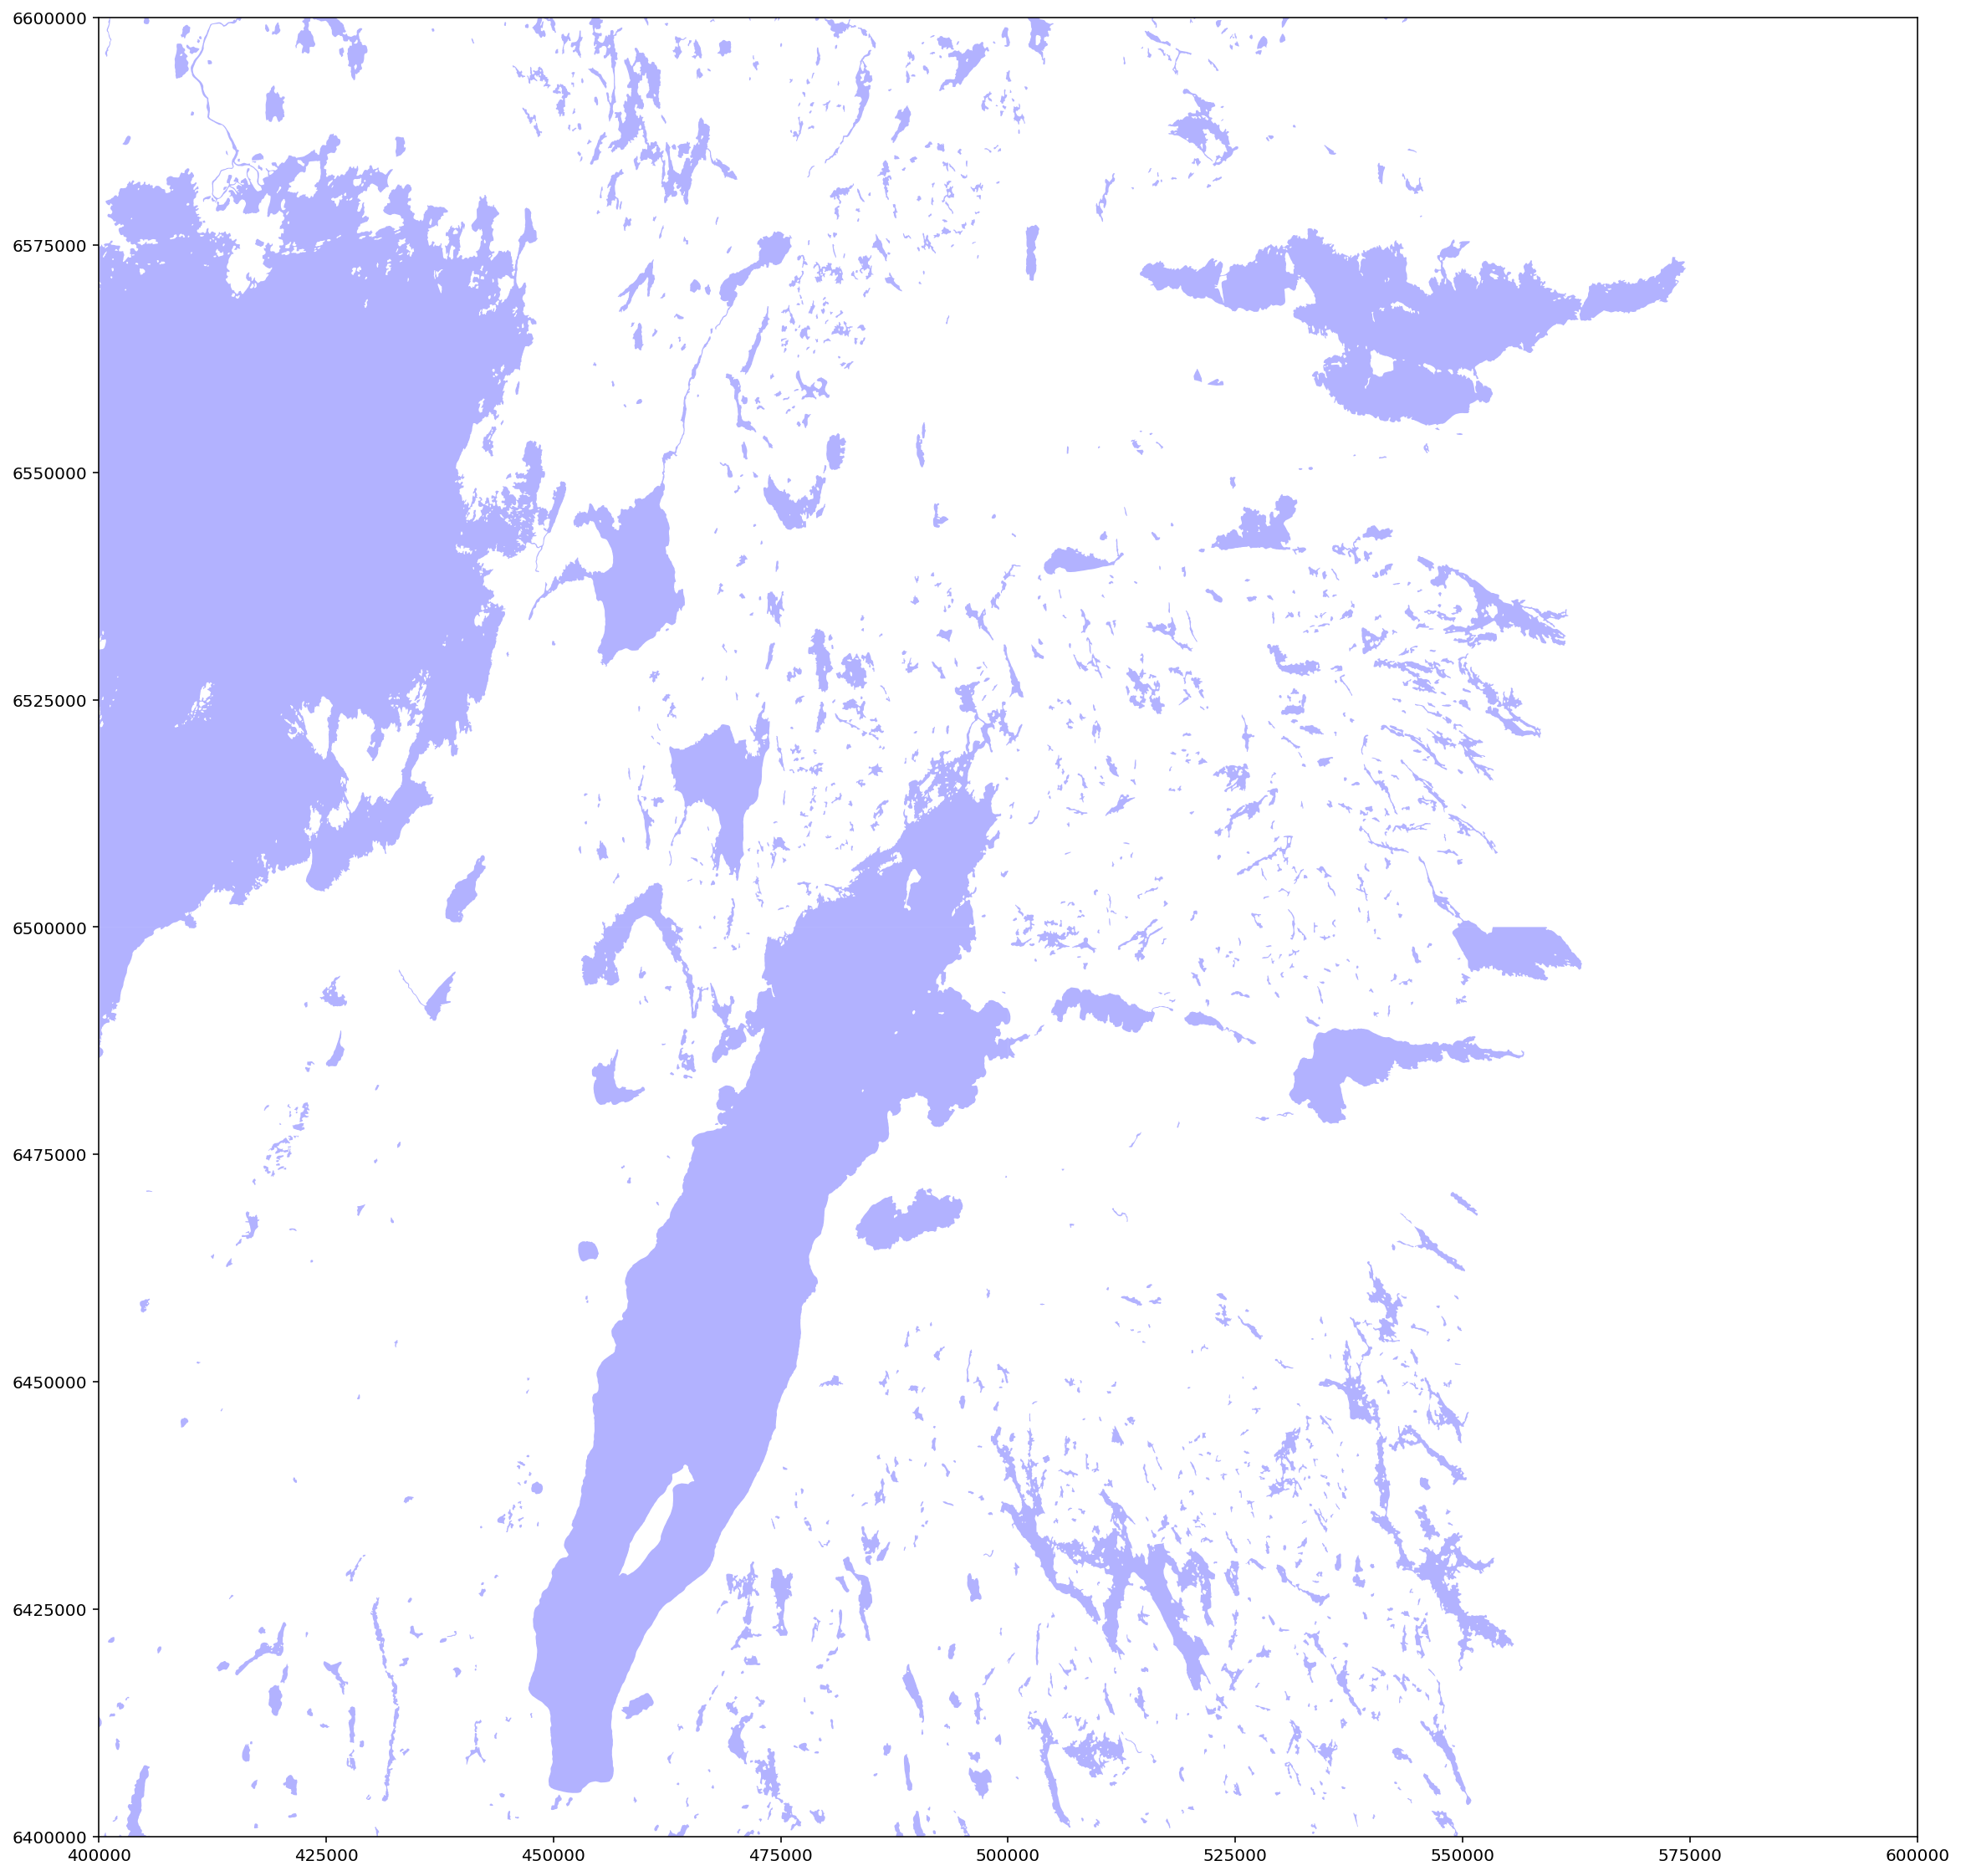

In [105]:
import matplotlib.patheffects as mpe

outline=mpe.withStroke(linewidth=8, foreground='black')





plt.figure(figsize=(20,20)) 
ax=plt.axes()
plt.xlim(mapxwest,mapxeast)
plt.ylim(mapysouth, mapynorth)


# ax.axis('off')
# map_df_sweden.plot(edgecolor='black',facecolor='white',ax=ax)
map_df_sweden_water.loc[map_df_sweden_water['KKOD'] == 901].plot(
    ax=ax, facecolor='blue',alpha=0.3, label='Water')

# map_df_sweden_water.loc[map_df_sweden_water['KKOD'] == 303].plot(
#     ax=ax, facecolor='red', alpha=0.3, label='Build-up')
# map_df_sweden_water.loc[map_df_sweden_water['KKOD'] == 601].plot(
#     ax=ax, facecolor='darkgreen', alpha=.3, label='forest')
# map_df_sweden_water[map_df_sweden_water['KKOD'].isin([611,612,911, 631, 302])].plot(
#     ax=ax, facecolor='orange', alpha=.3, label='Open area')
# map_df_sweden_boundary.loc[map_df_sweden_boundary['KKOD'] <= 4130].plot(ax=ax, edgecolor='black', lw=.5)
# map_df_sweden_road.loc[map_df_sweden_road['KKOD'] < 5300].plot(ax=ax,color='red', lw=1)#,
#                                                                     #   path_effects=[outline])
# map_df_sweden_rail.plot(ax=ax, color='blue', lw=2, label='railroad')

# names = map_df_sweden_names.loc[(map_df_sweden_names['KKOD'].isin([109, 104, 108])) & (map_df_sweden_names[map_df_sweden_names.geometry.within(map_df_sweden_names.geometry.cx[shapexwest:shapexeast,shapeysouth:shapeynorth])])]
                            
# texts = []

# for x, y, label in zip(names.geometry.x, 
#                        names.geometry.y, 
#                        names['TEXT']):
#                         texts.append(plt.text(x, y, label, fontsize = 12, weight='heavy'))
names = map_df_sweden_names_.loc[(map_df_sweden_names_['KKOD'].isin([109, 104, 108]))]
                            
texts = []

for x, y, label in zip(names.geometry.x, 
                       names.geometry.y, 
                       names['TEXT']):
                        texts.append(plt.text(x, y, label, fontsize = 12, weight='heavy'))
ax.grid(True)

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

water = mpatches.Patch(color='blue', label='Water')
plt.legend(handles=[water], bbox_to_anchor=(1.05, 0), loc=2, borderaxespad=0.5, fontsize='30')

plt.show()

In [88]:
import matplotlib.patheffects as mpe

outline=mpe.withStroke(linewidth=8, foreground='black')





plt.figure(figsize=(20,20)) 
ax=plt.axes()
# plt.xlim(mapxwest,mapxeast)
# plt.ylim(mapysouth, mapynorth)
plt.xlim(400000,425000)
plt.ylim(6565000,6590000)

bounds=map_df_sweden_names['geometry'].cx[400000:425000,6565000:6590000]
map_df_sweden_names__ = map_df_sweden_names[map_df_sweden_names.geometry.within(bounds)]
names=map_df_sweden_names__.loc[(map_df_sweden_names__['KKOD'].isin([109, 104, 108, 107, 5, 105, 7, 1]))]


ax.axis('off')
map_df_sweden.plot(edgecolor='black',facecolor='white',ax=ax)
x = map_df_sweden_water.loc[map_df_sweden_water['KKOD'] == 901].plot(
    ax=ax, facecolor='blue',alpha=0.5, label='Water')

map_df_sweden_water.loc[map_df_sweden_water['KKOD'] == 303].plot(
    ax=ax, facecolor='red', alpha=0.3, label='Build-up')
map_df_sweden_water.loc[map_df_sweden_water['KKOD'] == 601].plot(
    ax=ax, facecolor='darkgreen', alpha=.3, label='forest')
map_df_sweden_water[map_df_sweden_water['KKOD'].isin([611,612,911, 631, 302])].plot(
    ax=ax, facecolor='orange', alpha=.3, label='Open area')
map_df_sweden_boundary.loc[map_df_sweden_boundary['KKOD'] <= 4130].plot(ax=ax, edgecolor='black', lw=.5)
# map_df_sweden_road.loc[map_df_sweden_road['KKOD'] < 5600].plot(ax=ax,color='red', lw=1)#,
#                                                                     #   path_effects=[outline])
map_df_sweden_road.plot(ax=ax,color='red', lw=1)#,
                                                                    #   path_effects=[outline])
map_df_sweden_rail.plot(ax=ax, color='blue', lw=2, label='railroad')


texts = []

for x, y, label in zip(names.geometry.x, 
                       names.geometry.y, 
                       names['TEXT']):
                        texts.append(plt.text(x, y, label, fontsize = 12, weight='heavy', 
                                              bbox=dict(boxstyle='square,pad=0.1', fc='white', ec='none')))
      

ax.grid(True)
plt.legend(bbox_to_anchor=(1.05, 0), loc=2, borderaxespad=0.5);



# # remove the axis
# ax.axis(‘off’)
# # add a title
# ax.set_title(‘Population of Rajasthan’, fontdict={‘fontsize’: ‘25’, ‘fontweight’ : ‘3’})
# # create an annotation for the data source
# ax.annotate(‘Source: Rajasthan Datastore, 2019’,xy=(0.1, .08), xycoords=’figure fraction’, horizontalalignment=’left’, verticalalignment=’top’, fontsize=12, color=’#555555')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x116917290> (for post_execute):


TypeError: float() argument must be a string or a number, not 'list'

TypeError: float() argument must be a string or a number, not 'list'

<Figure size 1440x1440 with 1 Axes>

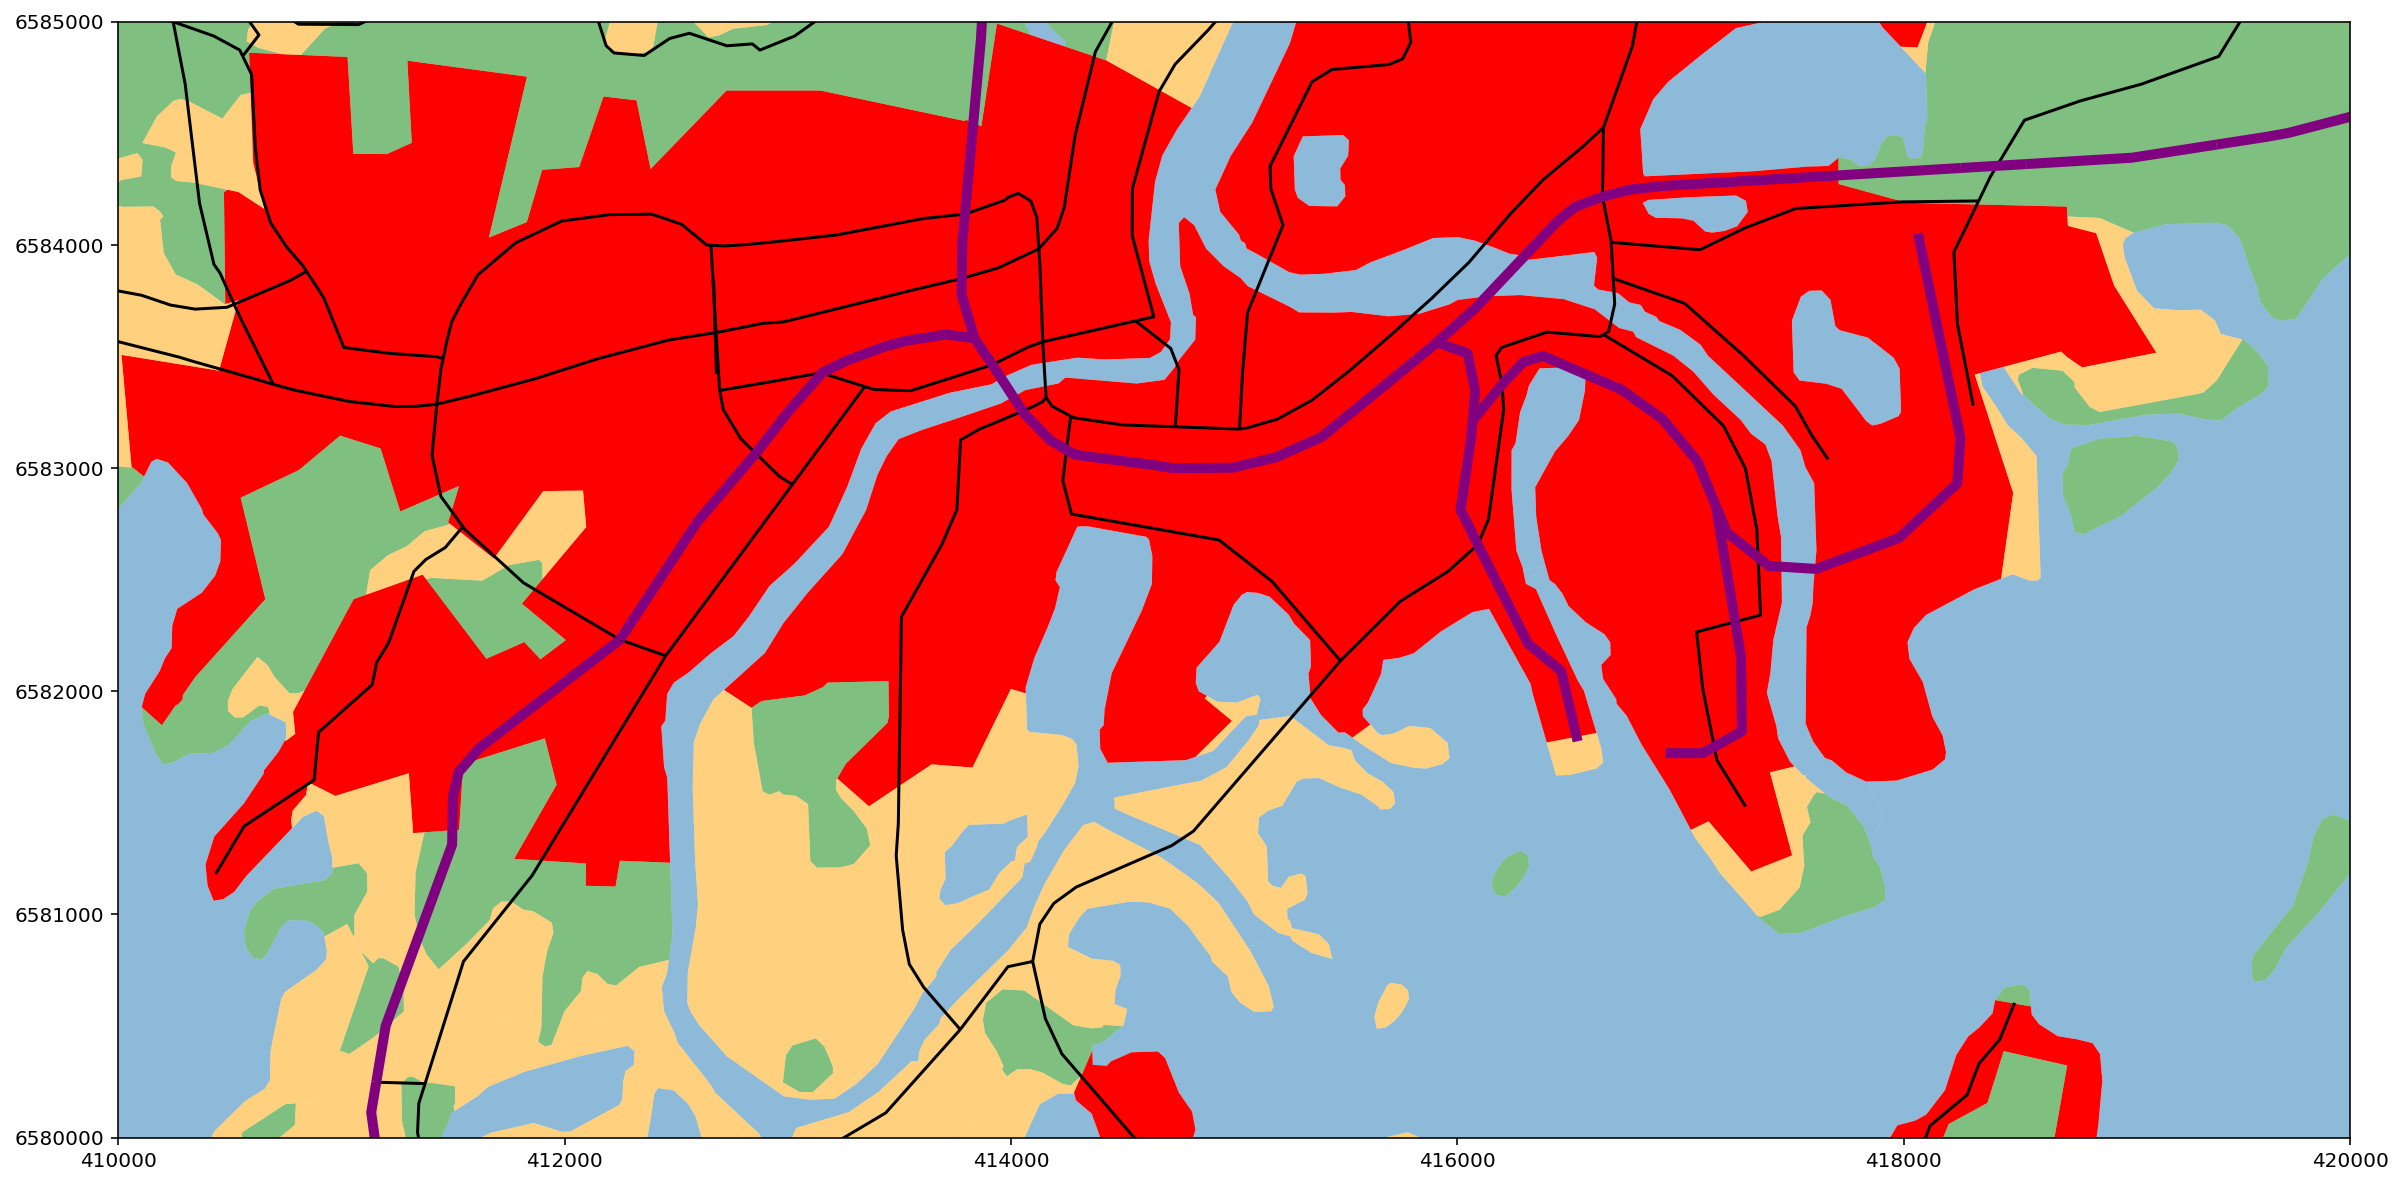

In [106]:
plt.figure(figsize=(20,20)) 
ax=plt.axes()
plt.xlim(410000,420000)
plt.ylim(6580000,6585000)

# ax.axis('off')
# map_df_sweden.plot(edgecolor='black',facecolor='white',ax=ax)
map_df_sweden_water.loc[map_df_sweden_water['KKOD'] == 901].plot(ax=ax, alpha=0.5)
map_df_sweden_water.loc[map_df_sweden_water['KKOD'] == 303].plot(ax=ax, facecolor='red')

map_df_sweden_water.loc[map_df_sweden_water['KKOD'] == 601].plot(ax=ax, facecolor='green', alpha=.5)
map_df_sweden_water[map_df_sweden_water['KKOD'].isin([611,612,911, 902, 631, 302])].plot(ax=ax, facecolor='orange',
                                                                                                           alpha=.5)


map_df_sweden_boundary.loc[map_df_sweden_boundary['KKOD'] <= 4130].plot(ax=ax)
map_df_sweden_road.loc[map_df_sweden_road['KKOD'] < 5700].plot(ax=ax, color='black')
map_df_sweden_rail.plot(ax=ax, color='purple', lw=5)#overlay water in white
# map_df_kustlijn.plot(edgecolor='white', facecolor='blue',ax=ax);


No handles with labels found to put in legend.


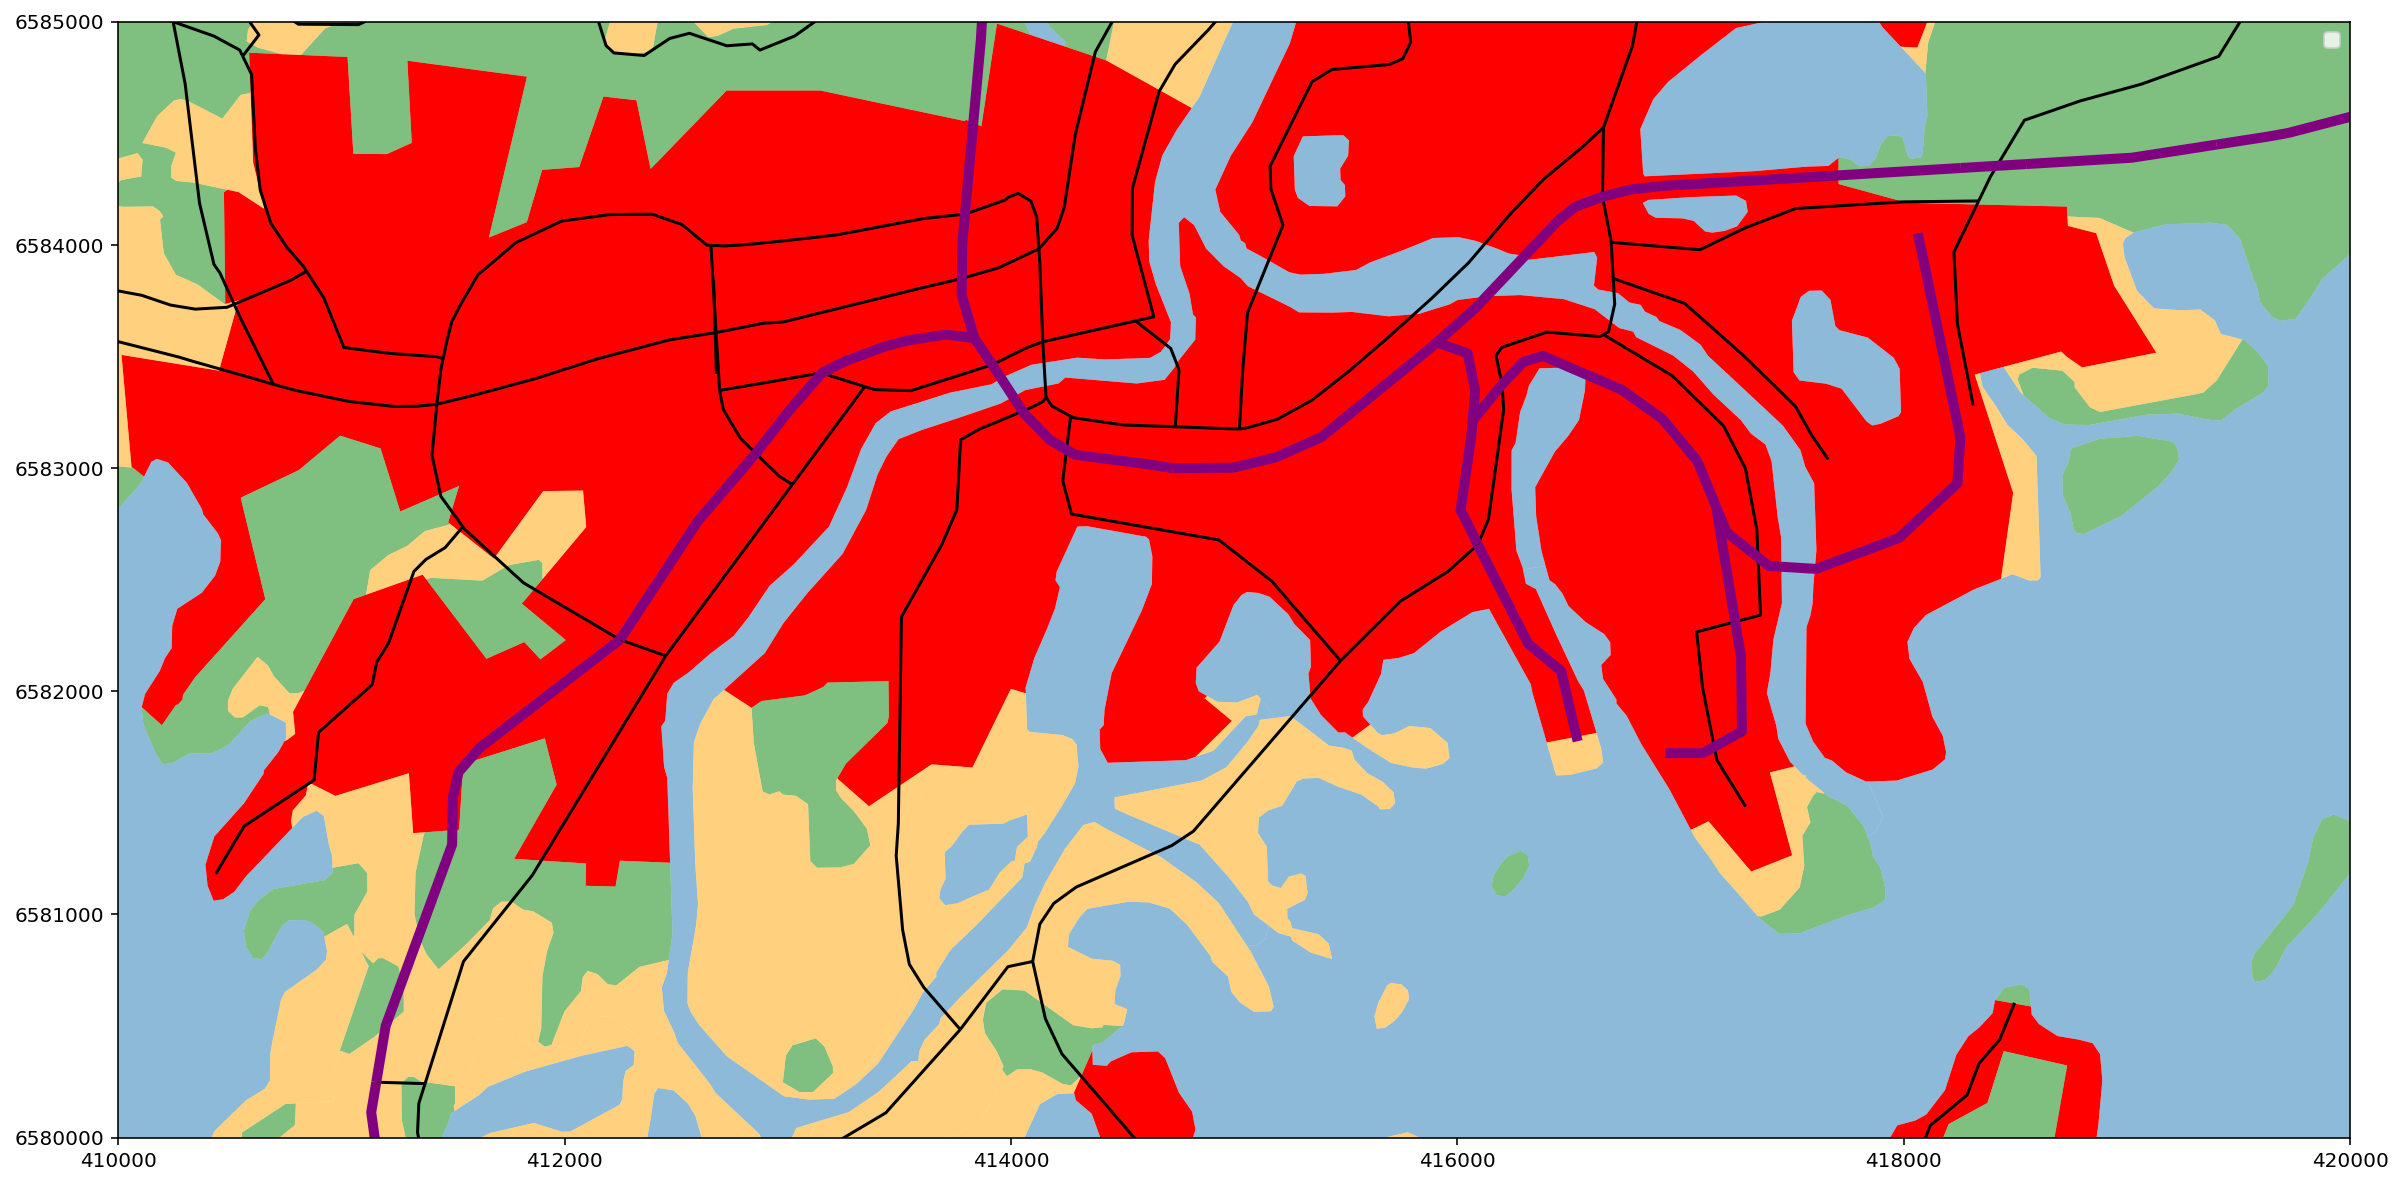

In [107]:
plt.figure(figsize=(20,20)) 
ax=plt.axes()
plt.xlim(410000,420000)
plt.ylim(6580000,6585000)

# ax.axis('off')
# map_df_sweden.plot(edgecolor='black',facecolor='white',ax=ax)
map_df_sweden_water.loc[map_df_sweden_water['KKOD'] == 901].plot(ax=ax, alpha=0.5)
map_df_sweden_water.loc[map_df_sweden_water['KKOD'] == 303].plot(ax=ax, facecolor='red')

map_df_sweden_water.loc[map_df_sweden_water['KKOD'] == 601].plot(ax=ax, facecolor='green', alpha=.5)
map_df_sweden_water[map_df_sweden_water['KKOD'].isin([611,612,911, 902, 631, 302])].plot(ax=ax, facecolor='orange',
                                                                                                           alpha=.5)


map_df_sweden_boundary.loc[map_df_sweden_boundary['KKOD'] <= 4130].plot(ax=ax)
map_df_sweden_road.loc[map_df_sweden_road['KKOD'] < 5700].plot(ax=ax, color='black')
map_df_sweden_rail.plot(ax=ax, color='purple', lw=5)#overlay water in white
# map_df_kustlijn.plot(edgecolor='white', facecolor='blue',ax=ax);
plt.legend()

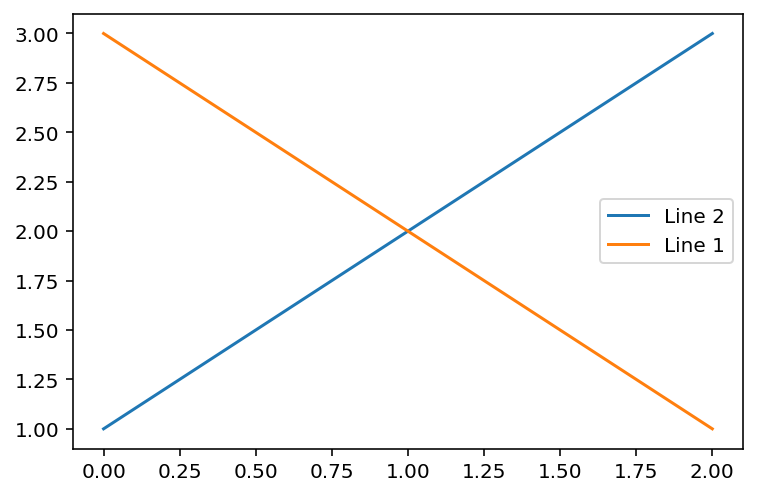

In [92]:
line_up, = plt.plot([1,2,3], label='Line 2')
line_down, = plt.plot([3,2,1], label='Line 1')
plt.legend()#handles=[line_up, line_down])

In [116]:
map_df_sweden['KATEGORI'].value_counts()

Vattenyta                        40357
Öppen mark                       38577
Skogsmark                        34208
Sankmark                         22339
Tätort                            2113
Kalfjäll                          1372
Annan koncentrerad bebyggelse      861
Glaciär                            273
Hav, territorialt vatten           139
Alvarmark                           22
Name: KATEGORI, dtype: int64

In [172]:
# temp=map_df_sweden.loc[map_df_sweden['KATEGORI']=='Öppen mark']
bounds=map_df_sweden['geometry'].cx[450000:550000,6700000:6800000]

In [173]:
sw_sub = map_df_sweden[map_df_sweden.geometry.within(bounds)]
